### Linear Algebra, Calculus, and Gradient Descent

#### Objectives
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">

It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Recommendation engines are able to make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "./resources/netflix.png">

### Group 1: using code to explain vectors and scalars

## Vectors

An array with magnitude and direction. The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin.


Operations with vectores
Assume

$ \vec{v} = \begin{bmatrix}v_{1} \\v_{2}\end{bmatrix} $


$ \vec{w} = \begin{bmatrix}w_{1} \\w_{2}\end{bmatrix} $

$ \vec{v} + \vec{w} = \begin{bmatrix}v_{1} + w_{1} \\v_{2} + w_{2}\end{bmatrix} $

What is happening graphically? Let's look at an example:


In [3]:

import numpy as np
v = np.array([2, 4])
w = np.array([3, 2])
v + w

array([5, 6])

#### Scalars

Have magnitude only. Can be multiplied by a vector or matrix to create a change in **scale** and/or direction.

What scalars would you need to change the direction of a vector?

In [4]:
v * 4

array([ 8, 16])

### Group 2: Desmos to explore vectors and scalars

[link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)

To capture the relationship between (*a, b*), to capture the _direction_ rather than the length, what mathematical concept would you use?

### Group 3: Youtube vid

[Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Linear Combination
If $v_{1},...,v_{n}$ are vectors and $a_{1},...,a_{n}$ are scalars, then the linear combination of those vectors with those scalars as coefficients is

<img src = "./resources/linear_combinations.svg"> 

### Dot Product

Can be thought of as one vector projected onto another

The dot product of v and w is $v \cdot w = (v_{1})(w_{1}) + (v_{2})(w_{2}) $

### _**Details of dot product for those who are interested**_

If v and w are perpendicular ($90^\circ$), their dot product will be 0.

If the angle between v and w is < $90^\circ$, the dot product will be positive.

If the angle between v and w is between $90^\circ$ and $180^\circ$, the dot product will be negative.





“The scalar projection of A onto B multiplied by the magnitude of B”

“The scalar projection of B onto A multiplied by the magnitude of A”

<img src = "./resources/dot_product.png">

<img src = "./resources/dot_product_components.png">

We are essentially, rotating vectors to the point of 
a · b = |a| × |b| × cos(θ)

Analogy from https://www.youtube.com/watch?v=FrDAU2N0FEg

In [5]:
v.dot(w)

14

## Application of dot product:

Imagine you are an e-commerce company. You have vectors to represent the transactions made with one of your items. Q is the quantity and represent the amount of cash either bought or sold.

$ Income = (q_{1},q_{2},q_{3})\cdot (p_{1},p_{2},p_{3}) $

What story is this telling?

In [6]:
q = np.array([4,6,10])
p = np.array([50,-30,45])

q.dot(p)

470

In [7]:
p.dot(q)

470

Wait, does that look familiar somehow?

## Slide break!

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

**Good video on details of gradient decent**

https://www.youtube.com/watch?v=sDv4f4s2SB8

### Gradient Descent


[slide deck!](https://docs.google.com/presentation/d/15sZl0yjwrjXkOSftImmAlEOgJxB7Qc8e2vocvMUkRWI/edit?usp=sharing)

In [8]:
import random


In [9]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [10]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

In [11]:
import os
import sys

In [12]:
sys.version

'3.7.3 (default, Mar 27 2019, 16:54:48) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [16]:
import pandas as pd
import seaborn as sns

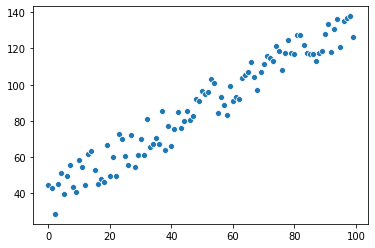

In [18]:
sns.scatterplot(x=x[:,1], y=y);

In [19]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [20]:
numIterations= 100000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations)

Iteration 0 | Cost: 198.769626
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 198.760537
[1.90689394 1.53442753]
Iteration 2 | Cost: 198.751592
[1.90783513 1.5345323 ]
Iteration 3 | Cost: 198.742713
[1.9087757  1.53459801]
Iteration 4 | Cost: 198.733863
[1.90971586 1.53463749]
Iteration 5 | Cost: 198.725027
[1.91065572 1.53465935]
Iteration 6 | Cost: 198.716197
[1.91159539 1.53466938]
Iteration 7 | Cost: 198.707371
[1.91253491 1.53467147]
Iteration 8 | Cost: 198.698546
[1.91347432 1.53466822]
Iteration 9 | Cost: 198.689722
[1.91441366 1.53466138]
Iteration 10 | Cost: 198.680899
[1.91535294 1.53465214]
Iteration 11 | Cost: 198.672076
[1.91629217 1.53464129]
Iteration 12 | Cost: 198.663254
[1.91723136 1.53462935]
Iteration 13 | Cost: 198.654433
[1.91817051 1.53461668]
Iteration 14 | Cost: 198.645612
[1.91910964 1.53460352]
Iteration 15 | Cost: 198.636791
[1.92004873 1.53459004]
Iteration 16 | Cost: 198.627971
[1.9209878  1.53457633]
Iteration 17 | Cost: 198.619151
[1.92192684 1.53456248]
It

Iteration 882 | Cost: 191.155223
[2.72533541 1.52245047]
Iteration 883 | Cost: 191.146782
[2.72625404 1.52243663]
Iteration 884 | Cost: 191.138342
[2.72717265 1.52242278]
Iteration 885 | Cost: 191.129902
[2.72809123 1.52240893]
Iteration 886 | Cost: 191.121463
[2.72900979 1.52239508]
Iteration 887 | Cost: 191.113024
[2.72992833 1.52238123]
Iteration 888 | Cost: 191.104586
[2.73084684 1.52236738]
Iteration 889 | Cost: 191.096148
[2.73176533 1.52235353]
Iteration 890 | Cost: 191.087710
[2.7326838  1.52233969]
Iteration 891 | Cost: 191.079273
[2.73360224 1.52232584]
Iteration 892 | Cost: 191.070836
[2.73452066 1.52231199]
Iteration 893 | Cost: 191.062400
[2.73543906 1.52229815]
Iteration 894 | Cost: 191.053964
[2.73635743 1.5222843 ]
Iteration 895 | Cost: 191.045528
[2.73727578 1.52227046]
Iteration 896 | Cost: 191.037093
[2.73819411 1.52225661]
Iteration 897 | Cost: 191.028659
[2.73911241 1.52224277]
Iteration 898 | Cost: 191.020225
[2.74003069 1.52222892]
Iteration 899 | Cost: 191.01179

[3.57146598 1.50969375]
Iteration 1815 | Cost: 183.463439
[3.57236314 1.50968023]
Iteration 1816 | Cost: 183.455389
[3.57326028 1.5096667 ]
Iteration 1817 | Cost: 183.447339
[3.5741574  1.50965317]
Iteration 1818 | Cost: 183.439289
[3.57505449 1.50963965]
Iteration 1819 | Cost: 183.431240
[3.57595156 1.50962612]
Iteration 1820 | Cost: 183.423191
[3.57684861 1.5096126 ]
Iteration 1821 | Cost: 183.415143
[3.57774564 1.50959908]
Iteration 1822 | Cost: 183.407095
[3.57864264 1.50958555]
Iteration 1823 | Cost: 183.399048
[3.57953962 1.50957203]
Iteration 1824 | Cost: 183.391001
[3.58043658 1.50955851]
Iteration 1825 | Cost: 183.382954
[3.58133351 1.50954498]
Iteration 1826 | Cost: 183.374908
[3.58223043 1.50953146]
Iteration 1827 | Cost: 183.366862
[3.58312731 1.50951794]
Iteration 1828 | Cost: 183.358817
[3.58402418 1.50950442]
Iteration 1829 | Cost: 183.350772
[3.58492103 1.5094909 ]
Iteration 1830 | Cost: 183.342727
[3.58581785 1.50947738]
Iteration 1831 | Cost: 183.334683
[3.58671465 1.

[4.38467786 1.49743333]
Iteration 2732 | Cost: 176.250225
[4.38555439 1.49742011]
Iteration 2733 | Cost: 176.242540
[4.3864309 1.4974069]
Iteration 2734 | Cost: 176.234856
[4.38730739 1.49739368]
Iteration 2735 | Cost: 176.227173
[4.38818385 1.49738047]
Iteration 2736 | Cost: 176.219490
[4.38906029 1.49736726]
Iteration 2737 | Cost: 176.211807
[4.38993671 1.49735404]
Iteration 2738 | Cost: 176.204124
[4.39081311 1.49734083]
Iteration 2739 | Cost: 176.196442
[4.39168948 1.49732762]
Iteration 2740 | Cost: 176.188761
[4.39256584 1.49731441]
Iteration 2741 | Cost: 176.181080
[4.39344217 1.49730119]
Iteration 2742 | Cost: 176.173399
[4.39431847 1.49728798]
Iteration 2743 | Cost: 176.165718
[4.39519476 1.49727477]
Iteration 2744 | Cost: 176.158038
[4.39607102 1.49726156]
Iteration 2745 | Cost: 176.150359
[4.39694726 1.49724835]
Iteration 2746 | Cost: 176.142680
[4.39782348 1.49723514]
Iteration 2747 | Cost: 176.135001
[4.39869968 1.49722193]
Iteration 2748 | Cost: 176.127322
[4.39957586 1.49

[5.16634007 1.48564857]
Iteration 3634 | Cost: 169.475029
[5.16719677 1.48563565]
Iteration 3635 | Cost: 169.467689
[5.16805345 1.48562273]
Iteration 3636 | Cost: 169.460349
[5.1689101  1.48560982]
Iteration 3637 | Cost: 169.453009
[5.16976673 1.4855969 ]
Iteration 3638 | Cost: 169.445670
[5.17062335 1.48558399]
Iteration 3639 | Cost: 169.438330
[5.17147994 1.48557107]
Iteration 3640 | Cost: 169.430992
[5.1723365  1.48555816]
Iteration 3641 | Cost: 169.423654
[5.17319305 1.48554525]
Iteration 3642 | Cost: 169.416316
[5.17404958 1.48553233]
Iteration 3643 | Cost: 169.408978
[5.17490608 1.48551942]
Iteration 3644 | Cost: 169.401641
[5.17576256 1.48550651]
Iteration 3645 | Cost: 169.394304
[5.17661902 1.4854936 ]
Iteration 3646 | Cost: 169.386968
[5.17747546 1.48548068]
Iteration 3647 | Cost: 169.379632
[5.17833188 1.48546777]
Iteration 3648 | Cost: 169.372296
[5.17918827 1.48545486]
Iteration 3649 | Cost: 169.364961
[5.18004464 1.48544195]
Iteration 3650 | Cost: 169.357626
[5.18090099 1.

[5.95291712 1.4737897 ]
Iteration 4563 | Cost: 162.813743
[5.95375386 1.47377709]
Iteration 4564 | Cost: 162.806741
[5.95459058 1.47376447]
Iteration 4565 | Cost: 162.799739
[5.95542728 1.47375186]
Iteration 4566 | Cost: 162.792737
[5.95626396 1.47373925]
Iteration 4567 | Cost: 162.785735
[5.95710062 1.47372663]
Iteration 4568 | Cost: 162.778734
[5.95793725 1.47371402]
Iteration 4569 | Cost: 162.771733
[5.95877387 1.4737014 ]
Iteration 4570 | Cost: 162.764733
[5.95961046 1.47368879]
Iteration 4571 | Cost: 162.757733
[5.96044703 1.47367618]
Iteration 4572 | Cost: 162.750733
[5.96128359 1.47366357]
Iteration 4573 | Cost: 162.743734
[5.96212012 1.47365095]
Iteration 4574 | Cost: 162.736735
[5.96295663 1.47363834]
Iteration 4575 | Cost: 162.729736
[5.96379311 1.47362573]
Iteration 4576 | Cost: 162.722738
[5.96462958 1.47361312]
Iteration 4577 | Cost: 162.715740
[5.96546602 1.47360051]
Iteration 4578 | Cost: 162.708743
[5.96630245 1.4735879 ]
Iteration 4579 | Cost: 162.701746
[5.96713885 1.

[6.70727483 1.4624166 ]
Iteration 5475 | Cost: 156.572798
[6.70809244 1.46240427]
Iteration 5476 | Cost: 156.566112
[6.70891002 1.46239195]
Iteration 5477 | Cost: 156.559427
[6.70972758 1.46237962]
Iteration 5478 | Cost: 156.552742
[6.71054512 1.46236729]
Iteration 5479 | Cost: 156.546057
[6.71136264 1.46235497]
Iteration 5480 | Cost: 156.539372
[6.71218014 1.46234264]
Iteration 5481 | Cost: 156.532688
[6.71299762 1.46233032]
Iteration 5482 | Cost: 156.526004
[6.71381508 1.46231799]
Iteration 5483 | Cost: 156.519321
[6.71463252 1.46230567]
Iteration 5484 | Cost: 156.512638
[6.71544994 1.46229335]
Iteration 5485 | Cost: 156.505955
[6.71626733 1.46228102]
Iteration 5486 | Cost: 156.499272
[6.71708471 1.4622687 ]
Iteration 5487 | Cost: 156.492590
[6.71790206 1.46225638]
Iteration 5488 | Cost: 156.485908
[6.7187194  1.46224405]
Iteration 5489 | Cost: 156.479227
[6.71953671 1.46223173]
Iteration 5490 | Cost: 156.472546
[6.720354   1.46221941]
Iteration 5491 | Cost: 156.465865
[6.72117127 1.

[7.41160559 1.45179773]
Iteration 6346 | Cost: 150.876090
[7.41240532 1.45178567]
Iteration 6347 | Cost: 150.869693
[7.41320504 1.45177361]
Iteration 6348 | Cost: 150.863297
[7.41400473 1.45176156]
Iteration 6349 | Cost: 150.856900
[7.4148044 1.4517495]
Iteration 6350 | Cost: 150.850505
[7.41560405 1.45173744]
Iteration 6351 | Cost: 150.844109
[7.41640369 1.45172539]
Iteration 6352 | Cost: 150.837714
[7.4172033  1.45171333]
Iteration 6353 | Cost: 150.831319
[7.41800289 1.45170128]
Iteration 6354 | Cost: 150.824925
[7.41880246 1.45168922]
Iteration 6355 | Cost: 150.818530
[7.41960201 1.45167717]
Iteration 6356 | Cost: 150.812136
[7.42040155 1.45166511]
Iteration 6357 | Cost: 150.805743
[7.42120106 1.45165306]
Iteration 6358 | Cost: 150.799350
[7.42200055 1.45164101]
Iteration 6359 | Cost: 150.792957
[7.42280002 1.45162895]
Iteration 6360 | Cost: 150.786564
[7.42359947 1.4516169 ]
Iteration 6361 | Cost: 150.780172
[7.4243989  1.45160485]
Iteration 6362 | Cost: 150.773780
[7.42519831 1.45

Iteration 7207 | Cost: 145.486896
[8.0935012 1.4415171]
Iteration 7208 | Cost: 145.480772
[8.09428364 1.4415053 ]
Iteration 7209 | Cost: 145.474649
[8.09506605 1.44149351]
Iteration 7210 | Cost: 145.468527
[8.09584845 1.44148171]
Iteration 7211 | Cost: 145.462404
[8.09663082 1.44146992]
Iteration 7212 | Cost: 145.456282
[8.09741317 1.44145812]
Iteration 7213 | Cost: 145.450160
[8.09819551 1.44144632]
Iteration 7214 | Cost: 145.444039
[8.09897782 1.44143453]
Iteration 7215 | Cost: 145.437918
[8.09976012 1.44142274]
Iteration 7216 | Cost: 145.431797
[8.10054239 1.44141094]
Iteration 7217 | Cost: 145.425676
[8.10132465 1.44139915]
Iteration 7218 | Cost: 145.419556
[8.10210688 1.44138735]
Iteration 7219 | Cost: 145.413436
[8.1028891  1.44137556]
Iteration 7220 | Cost: 145.407317
[8.10367129 1.44136377]
Iteration 7221 | Cost: 145.401197
[8.10445347 1.44135198]
Iteration 7222 | Cost: 145.395078
[8.10523562 1.44134018]
Iteration 7223 | Cost: 145.388960
[8.10601776 1.44132839]
Iteration 7224 |

[8.7491606  1.43163202]
Iteration 8055 | Cost: 140.404312
[8.74992639 1.43162048]
Iteration 8056 | Cost: 140.398446
[8.75069217 1.43160893]
Iteration 8057 | Cost: 140.392581
[8.75145793 1.43159739]
Iteration 8058 | Cost: 140.386716
[8.75222367 1.43158584]
Iteration 8059 | Cost: 140.380852
[8.75298939 1.4315743 ]
Iteration 8060 | Cost: 140.374987
[8.7537551  1.43156275]
Iteration 8061 | Cost: 140.369123
[8.75452078 1.43155121]
Iteration 8062 | Cost: 140.363260
[8.75528644 1.43153967]
Iteration 8063 | Cost: 140.357396
[8.75605208 1.43152812]
Iteration 8064 | Cost: 140.351533
[8.75681771 1.43151658]
Iteration 8065 | Cost: 140.345671
[8.75758331 1.43150504]
Iteration 8066 | Cost: 140.339808
[8.7583489  1.43149349]
Iteration 8067 | Cost: 140.333946
[8.75911446 1.43148195]
Iteration 8068 | Cost: 140.328084
[8.75988001 1.43147041]
Iteration 8069 | Cost: 140.322223
[8.76064554 1.43145887]
Iteration 8070 | Cost: 140.316361
[8.76141104 1.43144733]
Iteration 8071 | Cost: 140.310500
[8.76217653 1.

Iteration 8845 | Cost: 135.862148
[9.34887709 1.42259037]
Iteration 8846 | Cost: 135.856513
[9.34962767 1.42257906]
Iteration 8847 | Cost: 135.850878
[9.35037824 1.42256774]
Iteration 8848 | Cost: 135.845244
[9.35112878 1.42255642]
Iteration 8849 | Cost: 135.839610
[9.35187931 1.42254511]
Iteration 8850 | Cost: 135.833976
[9.35262982 1.42253379]
Iteration 8851 | Cost: 135.828342
[9.3533803  1.42252248]
Iteration 8852 | Cost: 135.822709
[9.35413077 1.42251116]
Iteration 8853 | Cost: 135.817076
[9.35488122 1.42249985]
Iteration 8854 | Cost: 135.811443
[9.35563165 1.42248854]
Iteration 8855 | Cost: 135.805811
[9.35638207 1.42247722]
Iteration 8856 | Cost: 135.800179
[9.35713246 1.42246591]
Iteration 8857 | Cost: 135.794547
[9.35788283 1.4224546 ]
Iteration 8858 | Cost: 135.788916
[9.35863319 1.42244328]
Iteration 8859 | Cost: 135.783284
[9.35938352 1.42243197]
Iteration 8860 | Cost: 135.777653
[9.36013384 1.42242066]
Iteration 8861 | Cost: 135.772023
[9.36088414 1.42240935]
Iteration 8862

Iteration 9663 | Cost: 131.346989
[9.9565345 1.413429 ]
Iteration 9664 | Cost: 131.341583
[9.95726966 1.41341792]
Iteration 9665 | Cost: 131.336177
[9.95800481 1.41340683]
Iteration 9666 | Cost: 131.330772
[9.95873994 1.41339575]
Iteration 9667 | Cost: 131.325367
[9.95947505 1.41338467]
Iteration 9668 | Cost: 131.319962
[9.96021014 1.41337358]
Iteration 9669 | Cost: 131.314558
[9.96094521 1.4133625 ]
Iteration 9670 | Cost: 131.309153
[9.96168027 1.41335142]
Iteration 9671 | Cost: 131.303749
[9.9624153  1.41334034]
Iteration 9672 | Cost: 131.298346
[9.96315032 1.41332926]
Iteration 9673 | Cost: 131.292942
[9.96388532 1.41331817]
Iteration 9674 | Cost: 131.287539
[9.9646203  1.41330709]
Iteration 9675 | Cost: 131.282136
[9.96535526 1.41329601]
Iteration 9676 | Cost: 131.276734
[9.9660902  1.41328493]
Iteration 9677 | Cost: 131.271332
[9.96682513 1.41327385]
Iteration 9678 | Cost: 131.265930
[9.96756003 1.41326277]
Iteration 9679 | Cost: 131.260528
[9.96829492 1.41325169]
Iteration 9680 |

Iteration 10502 | Cost: 126.906555
[10.56682819  1.40422788]
Iteration 10503 | Cost: 126.901374
[10.56754788  1.40421703]
Iteration 10504 | Cost: 126.896194
[10.56826754  1.40420618]
Iteration 10505 | Cost: 126.891014
[10.56898719  1.40419533]
Iteration 10506 | Cost: 126.885834
[10.56970681  1.40418448]
Iteration 10507 | Cost: 126.880655
[10.57042642  1.40417363]
Iteration 10508 | Cost: 126.875475
[10.57114601  1.40416278]
Iteration 10509 | Cost: 126.870297
[10.57186559  1.40415193]
Iteration 10510 | Cost: 126.865118
[10.57258514  1.40414109]
Iteration 10511 | Cost: 126.859939
[10.57330468  1.40413024]
Iteration 10512 | Cost: 126.854761
[10.5740242   1.40411939]
Iteration 10513 | Cost: 126.849583
[10.5747437   1.40410854]
Iteration 10514 | Cost: 126.844406
[10.57546318  1.4040977 ]
Iteration 10515 | Cost: 126.839228
[10.57618264  1.40408685]
Iteration 10516 | Cost: 126.834051
[10.57690209  1.404076  ]
Iteration 10517 | Cost: 126.828874
[10.57762151  1.40406516]
Iteration 10518 | Cost: 

Iteration 11324 | Cost: 122.735634
[11.15228843  1.39540117]
Iteration 11325 | Cost: 122.730665
[11.15299326  1.39539054]
Iteration 11326 | Cost: 122.725697
[11.15369807  1.39537991]
Iteration 11327 | Cost: 122.720728
[11.15440286  1.39536929]
Iteration 11328 | Cost: 122.715760
[11.15510764  1.39535866]
Iteration 11329 | Cost: 122.710792
[11.15581239  1.39534804]
Iteration 11330 | Cost: 122.705825
[11.15651713  1.39533741]
Iteration 11331 | Cost: 122.700857
[11.15722185  1.39532679]
Iteration 11332 | Cost: 122.695890
[11.15792656  1.39531616]
Iteration 11333 | Cost: 122.690923
[11.15863124  1.39530554]
Iteration 11334 | Cost: 122.685957
[11.15933591  1.39529491]
Iteration 11335 | Cost: 122.680990
[11.16004056  1.39528429]
Iteration 11336 | Cost: 122.676024
[11.16074519  1.39527367]
Iteration 11337 | Cost: 122.671058
[11.16144981  1.39526304]
Iteration 11338 | Cost: 122.666093
[11.1621544   1.39525242]
Iteration 11339 | Cost: 122.661127
[11.16285898  1.3952418 ]
Iteration 11340 | Cost: 

[11.78152123  1.38591451]
Iteration 12228 | Cost: 118.345105
[11.78221009  1.38590412]
Iteration 12229 | Cost: 118.340359
[11.78289894  1.38589374]
Iteration 12230 | Cost: 118.335613
[11.78358777  1.38588335]
Iteration 12231 | Cost: 118.330867
[11.78427658  1.38587297]
Iteration 12232 | Cost: 118.326122
[11.78496538  1.38586258]
Iteration 12233 | Cost: 118.321377
[11.78565415  1.3858522 ]
Iteration 12234 | Cost: 118.316632
[11.78634291  1.38584182]
Iteration 12235 | Cost: 118.311887
[11.78703165  1.38583143]
Iteration 12236 | Cost: 118.307143
[11.78772038  1.38582105]
Iteration 12237 | Cost: 118.302398
[11.78840909  1.38581067]
Iteration 12238 | Cost: 118.297654
[11.78909778  1.38580028]
Iteration 12239 | Cost: 118.292911
[11.78978645  1.3857899 ]
Iteration 12240 | Cost: 118.288167
[11.7904751   1.38577952]
Iteration 12241 | Cost: 118.283424
[11.79116374  1.38576913]
Iteration 12242 | Cost: 118.278681
[11.79185236  1.38575875]
Iteration 12243 | Cost: 118.273938
[11.79254096  1.38574837

Iteration 13100 | Cost: 114.296614
[12.37629614  1.37694736]
Iteration 13101 | Cost: 114.292073
[12.37696992  1.3769372 ]
Iteration 13102 | Cost: 114.287533
[12.37764367  1.37692705]
Iteration 13103 | Cost: 114.282993
[12.37831741  1.37691689]
Iteration 13104 | Cost: 114.278453
[12.37899114  1.37690673]
Iteration 13105 | Cost: 114.273913
[12.37966484  1.37689657]
Iteration 13106 | Cost: 114.269373
[12.38033853  1.37688642]
Iteration 13107 | Cost: 114.264834
[12.3810122   1.37687626]
Iteration 13108 | Cost: 114.260295
[12.38168586  1.3768661 ]
Iteration 13109 | Cost: 114.255756
[12.38235949  1.37685595]
Iteration 13110 | Cost: 114.251218
[12.38303311  1.37684579]
Iteration 13111 | Cost: 114.246679
[12.38370672  1.37683564]
Iteration 13112 | Cost: 114.242141
[12.3843803   1.37682548]
Iteration 13113 | Cost: 114.237603
[12.38505387  1.37681533]
Iteration 13114 | Cost: 114.233065
[12.38572743  1.37680517]
Iteration 13115 | Cost: 114.228528
[12.38640096  1.37679502]
Iteration 13116 | Cost: 

Iteration 13829 | Cost: 111.046844
[12.86296917  1.36961002]
Iteration 13830 | Cost: 111.042469
[12.8636306   1.36960004]
Iteration 13831 | Cost: 111.038093
[12.86429201  1.36959007]
Iteration 13832 | Cost: 111.033718
[12.8649534  1.3695801]
Iteration 13833 | Cost: 111.029342
[12.86561478  1.36957013]
Iteration 13834 | Cost: 111.024968
[12.86627614  1.36956016]
Iteration 13835 | Cost: 111.020593
[12.86693748  1.36955019]
Iteration 13836 | Cost: 111.016218
[12.86759881  1.36954022]
Iteration 13837 | Cost: 111.011844
[12.86826012  1.36953025]
Iteration 13838 | Cost: 111.007470
[12.86892141  1.36952028]
Iteration 13839 | Cost: 111.003096
[12.86958268  1.36951031]
Iteration 13840 | Cost: 110.998723
[12.87024394  1.36950034]
Iteration 13841 | Cost: 110.994349
[12.87090519  1.36949037]
Iteration 13842 | Cost: 110.989976
[12.87156641  1.3694804 ]
Iteration 13843 | Cost: 110.985603
[12.87222762  1.36947043]
Iteration 13844 | Cost: 110.981231
[12.87288881  1.36946046]
Iteration 13845 | Cost: 11

Iteration 14620 | Cost: 107.654050
[13.38094935  1.36180067]
Iteration 14621 | Cost: 107.649846
[13.38159763  1.36179089]
Iteration 14622 | Cost: 107.645643
[13.3822459   1.36178112]
Iteration 14623 | Cost: 107.641439
[13.38289415  1.36177134]
Iteration 14624 | Cost: 107.637236
[13.38354239  1.36176157]
Iteration 14625 | Cost: 107.633034
[13.38419061  1.3617518 ]
Iteration 14626 | Cost: 107.628831
[13.38483881  1.36174203]
Iteration 14627 | Cost: 107.624629
[13.385487    1.36173225]
Iteration 14628 | Cost: 107.620427
[13.38613517  1.36172248]
Iteration 14629 | Cost: 107.616225
[13.38678332  1.36171271]
Iteration 14630 | Cost: 107.612023
[13.38743146  1.36170294]
Iteration 14631 | Cost: 107.607821
[13.38807958  1.36169317]
Iteration 14632 | Cost: 107.603620
[13.38872768  1.3616834 ]
Iteration 14633 | Cost: 107.599419
[13.38937577  1.36167362]
Iteration 14634 | Cost: 107.595218
[13.39002384  1.36166385]
Iteration 14635 | Cost: 107.591018
[13.3906719   1.36165408]
Iteration 14636 | Cost: 

Iteration 15378 | Cost: 104.528114
[13.8676605   1.35446274]
Iteration 15379 | Cost: 104.524069
[13.86829644  1.35445316]
Iteration 15380 | Cost: 104.520025
[13.86893236  1.35444357]
Iteration 15381 | Cost: 104.515980
[13.86956827  1.35443398]
Iteration 15382 | Cost: 104.511936
[13.87020415  1.3544244 ]
Iteration 15383 | Cost: 104.507891
[13.87084003  1.35441481]
Iteration 15384 | Cost: 104.503847
[13.87147588  1.35440522]
Iteration 15385 | Cost: 104.499804
[13.87211172  1.35439564]
Iteration 15386 | Cost: 104.495760
[13.87274755  1.35438605]
Iteration 15387 | Cost: 104.491717
[13.87338335  1.35437646]
Iteration 15388 | Cost: 104.487673
[13.87401914  1.35436688]
Iteration 15389 | Cost: 104.483631
[13.87465492  1.35435729]
Iteration 15390 | Cost: 104.479588
[13.87529068  1.35434771]
Iteration 15391 | Cost: 104.475545
[13.87592642  1.35433812]
Iteration 15392 | Cost: 104.471503
[13.87656215  1.35432854]
Iteration 15393 | Cost: 104.467461
[13.87719786  1.35431895]
Iteration 15394 | Cost: 

[14.34821984  1.34721757]
Iteration 16142 | Cost: 101.496778
[14.34884358  1.34720817]
Iteration 16143 | Cost: 101.492887
[14.34946731  1.34719876]
Iteration 16144 | Cost: 101.488996
[14.35009103  1.34718936]
Iteration 16145 | Cost: 101.485105
[14.35071472  1.34717996]
Iteration 16146 | Cost: 101.481214
[14.3513384   1.34717055]
Iteration 16147 | Cost: 101.477324
[14.35196207  1.34716115]
Iteration 16148 | Cost: 101.473434
[14.35258572  1.34715175]
Iteration 16149 | Cost: 101.469544
[14.35320935  1.34714235]
Iteration 16150 | Cost: 101.465654
[14.35383297  1.34713295]
Iteration 16151 | Cost: 101.461764
[14.35445657  1.34712354]
Iteration 16152 | Cost: 101.457875
[14.35508016  1.34711414]
Iteration 16153 | Cost: 101.453986
[14.35570373  1.34710474]
Iteration 16154 | Cost: 101.450097
[14.35632728  1.34709534]
Iteration 16155 | Cost: 101.446208
[14.35695082  1.34708594]
Iteration 16156 | Cost: 101.442319
[14.35757434  1.34707654]
Iteration 16157 | Cost: 101.438431
[14.35819785  1.34706714

[14.88188803  1.3391717 ]
Iteration 17007 | Cost: 98.203601
[14.88249824  1.3391625 ]
Iteration 17008 | Cost: 98.199877
[14.88310843  1.3391533 ]
Iteration 17009 | Cost: 98.196153
[14.8837186  1.3391441]
Iteration 17010 | Cost: 98.192429
[14.88432876  1.3391349 ]
Iteration 17011 | Cost: 98.188705
[14.8849389  1.3391257]
Iteration 17012 | Cost: 98.184982
[14.88554903  1.33911651]
Iteration 17013 | Cost: 98.181259
[14.88615914  1.33910731]
Iteration 17014 | Cost: 98.177536
[14.88676924  1.33909811]
Iteration 17015 | Cost: 98.173813
[14.88737932  1.33908891]
Iteration 17016 | Cost: 98.170091
[14.88798938  1.33907971]
Iteration 17017 | Cost: 98.166368
[14.88859943  1.33907052]
Iteration 17018 | Cost: 98.162646
[14.88920947  1.33906132]
Iteration 17019 | Cost: 98.158924
[14.88981948  1.33905212]
Iteration 17020 | Cost: 98.155202
[14.89042949  1.33904293]
Iteration 17021 | Cost: 98.151480
[14.89103948  1.33903373]
Iteration 17022 | Cost: 98.147759
[14.89164945  1.33902453]
Iteration 17023 | 

Iteration 17925 | Cost: 94.863191
[15.43618587  1.33081481]
Iteration 17926 | Cost: 94.859636
[15.43678201  1.33080582]
Iteration 17927 | Cost: 94.856082
[15.43737814  1.33079683]
Iteration 17928 | Cost: 94.852527
[15.43797425  1.33078784]
Iteration 17929 | Cost: 94.848973
[15.43857035  1.33077886]
Iteration 17930 | Cost: 94.845419
[15.43916643  1.33076987]
Iteration 17931 | Cost: 94.841866
[15.43976249  1.33076088]
Iteration 17932 | Cost: 94.838312
[15.44035855  1.3307519 ]
Iteration 17933 | Cost: 94.834759
[15.44095458  1.33074291]
Iteration 17934 | Cost: 94.831206
[15.4415506   1.33073392]
Iteration 17935 | Cost: 94.827653
[15.44214661  1.33072494]
Iteration 17936 | Cost: 94.824100
[15.4427426   1.33071595]
Iteration 17937 | Cost: 94.820547
[15.44333857  1.33070697]
Iteration 17938 | Cost: 94.816995
[15.44393453  1.33069798]
Iteration 17939 | Cost: 94.813442
[15.44453048  1.330689  ]
Iteration 17940 | Cost: 94.809890
[15.44512641  1.33068001]
Iteration 17941 | Cost: 94.806338
[15.44

[15.93340318  1.32331849]
Iteration 18769 | Cost: 91.926362
[15.93398671  1.32330969]
Iteration 18770 | Cost: 91.922957
[15.93457022  1.32330089]
Iteration 18771 | Cost: 91.919551
[15.93515371  1.3232921 ]
Iteration 18772 | Cost: 91.916146
[15.9357372  1.3232833]
Iteration 18773 | Cost: 91.912741
[15.93632066  1.3232745 ]
Iteration 18774 | Cost: 91.909336
[15.93690412  1.32326571]
Iteration 18775 | Cost: 91.905931
[15.93748755  1.32325691]
Iteration 18776 | Cost: 91.902527
[15.93807098  1.32324811]
Iteration 18777 | Cost: 91.899122
[15.93865438  1.32323932]
Iteration 18778 | Cost: 91.895718
[15.93923778  1.32323052]
Iteration 18779 | Cost: 91.892314
[15.93982116  1.32322173]
Iteration 18780 | Cost: 91.888910
[15.94040452  1.32321293]
Iteration 18781 | Cost: 91.885506
[15.94098787  1.32320414]
Iteration 18782 | Cost: 91.882103
[15.9415712   1.32319534]
Iteration 18783 | Cost: 91.878700
[15.94215452  1.32318655]
Iteration 18784 | Cost: 91.875296
[15.94273782  1.32317775]
Iteration 18785 

Iteration 19669 | Cost: 88.930191
[16.45320326  1.3154817 ]
Iteration 19670 | Cost: 88.926937
[16.4537736  1.3154731]
Iteration 19671 | Cost: 88.923684
[16.45434392  1.3154645 ]
Iteration 19672 | Cost: 88.920431
[16.45491423  1.31545591]
Iteration 19673 | Cost: 88.917178
[16.45548453  1.31544731]
Iteration 19674 | Cost: 88.913925
[16.45605481  1.31543871]
Iteration 19675 | Cost: 88.910672
[16.45662508  1.31543011]
Iteration 19676 | Cost: 88.907420
[16.45719533  1.31542151]
Iteration 19677 | Cost: 88.904167
[16.45776556  1.31541292]
Iteration 19678 | Cost: 88.900915
[16.45833579  1.31540432]
Iteration 19679 | Cost: 88.897663
[16.458906    1.31539572]
Iteration 19680 | Cost: 88.894411
[16.45947619  1.31538713]
Iteration 19681 | Cost: 88.891159
[16.46004637  1.31537853]
Iteration 19682 | Cost: 88.887908
[16.46061653  1.31536993]
Iteration 19683 | Cost: 88.884656
[16.46118668  1.31536134]
Iteration 19684 | Cost: 88.881405
[16.46175682  1.31535274]
Iteration 19685 | Cost: 88.878154
[16.4623

[16.95066146  1.30798175]
Iteration 20552 | Cost: 86.120639
[16.95121918  1.30797334]
Iteration 20553 | Cost: 86.117528
[16.95177688  1.30796494]
Iteration 20554 | Cost: 86.114417
[16.95233457  1.30795653]
Iteration 20555 | Cost: 86.111306
[16.95289225  1.30794812]
Iteration 20556 | Cost: 86.108196
[16.95344991  1.30793971]
Iteration 20557 | Cost: 86.105085
[16.95400755  1.3079313 ]
Iteration 20558 | Cost: 86.101975
[16.95456519  1.3079229 ]
Iteration 20559 | Cost: 86.098865
[16.95512281  1.30791449]
Iteration 20560 | Cost: 86.095755
[16.95568041  1.30790608]
Iteration 20561 | Cost: 86.092645
[16.956238    1.30789768]
Iteration 20562 | Cost: 86.089536
[16.95679558  1.30788927]
Iteration 20563 | Cost: 86.086426
[16.95735314  1.30788086]
Iteration 20564 | Cost: 86.083317
[16.95791069  1.30787246]
Iteration 20565 | Cost: 86.080208
[16.95846822  1.30786405]
Iteration 20566 | Cost: 86.077099
[16.95902574  1.30785565]
Iteration 20567 | Cost: 86.073990
[16.95958324  1.30784724]
Iteration 2056

[17.46490789  1.30022869]
Iteration 21485 | Cost: 83.285643
[17.46545256  1.30022048]
Iteration 21486 | Cost: 83.282676
[17.46599722  1.30021227]
Iteration 21487 | Cost: 83.279709
[17.46654186  1.30020406]
Iteration 21488 | Cost: 83.276742
[17.46708649  1.30019585]
Iteration 21489 | Cost: 83.273776
[17.4676311   1.30018764]
Iteration 21490 | Cost: 83.270809
[17.4681757   1.30017943]
Iteration 21491 | Cost: 83.267843
[17.46872029  1.30017122]
Iteration 21492 | Cost: 83.264877
[17.46926487  1.30016301]
Iteration 21493 | Cost: 83.261910
[17.46980943  1.3001548 ]
Iteration 21494 | Cost: 83.258944
[17.47035397  1.30014659]
Iteration 21495 | Cost: 83.255979
[17.4708985   1.30013838]
Iteration 21496 | Cost: 83.253013
[17.47144302  1.30013017]
Iteration 21497 | Cost: 83.250048
[17.47198753  1.30012196]
Iteration 21498 | Cost: 83.247082
[17.47253202  1.30011375]
Iteration 21499 | Cost: 83.244117
[17.47307649  1.30010554]
Iteration 21500 | Cost: 83.241152
[17.47362096  1.30009733]
Iteration 2150

[17.94051061  1.29305825]
Iteration 22368 | Cost: 80.723418
[17.94104321  1.29305022]
Iteration 22369 | Cost: 80.720581
[17.9415758   1.29304219]
Iteration 22370 | Cost: 80.717744
[17.94210838  1.29303416]
Iteration 22371 | Cost: 80.714907
[17.94264094  1.29302613]
Iteration 22372 | Cost: 80.712071
[17.94317349  1.2930181 ]
Iteration 22373 | Cost: 80.709234
[17.94370603  1.29301007]
Iteration 22374 | Cost: 80.706398
[17.94423855  1.29300205]
Iteration 22375 | Cost: 80.703561
[17.94477106  1.29299402]
Iteration 22376 | Cost: 80.700725
[17.94530355  1.29298599]
Iteration 22377 | Cost: 80.697889
[17.94583604  1.29297796]
Iteration 22378 | Cost: 80.695053
[17.9463685   1.29296993]
Iteration 22379 | Cost: 80.692218
[17.94690096  1.29296191]
Iteration 22380 | Cost: 80.689382
[17.9474334   1.29295388]
Iteration 22381 | Cost: 80.686547
[17.94796583  1.29294585]
Iteration 22382 | Cost: 80.683712
[17.94849824  1.29293782]
Iteration 22383 | Cost: 80.680876
[17.94903065  1.2929298 ]
Iteration 2238

[18.43680177  1.2855759 ]
Iteration 23311 | Cost: 78.110937
[18.43732178  1.28556806]
Iteration 23312 | Cost: 78.108232
[18.43784178  1.28556022]
Iteration 23313 | Cost: 78.105528
[18.43836176  1.28555238]
Iteration 23314 | Cost: 78.102823
[18.43888174  1.28554454]
Iteration 23315 | Cost: 78.100119
[18.4394017  1.2855367]
Iteration 23316 | Cost: 78.097415
[18.43992164  1.28552886]
Iteration 23317 | Cost: 78.094711
[18.44044158  1.28552102]
Iteration 23318 | Cost: 78.092007
[18.4409615   1.28551318]
Iteration 23319 | Cost: 78.089304
[18.4414814   1.28550534]
Iteration 23320 | Cost: 78.086600
[18.4420013  1.2854975]
Iteration 23321 | Cost: 78.083897
[18.44252118  1.28548967]
Iteration 23322 | Cost: 78.081194
[18.44304104  1.28548183]
Iteration 23323 | Cost: 78.078491
[18.4435609   1.28547399]
Iteration 23324 | Cost: 78.075788
[18.44408074  1.28546615]
Iteration 23325 | Cost: 78.073085
[18.44460057  1.28545832]
Iteration 23326 | Cost: 78.070382
[18.44512038  1.28545048]
Iteration 23327 | 

[18.91120287  1.27842357]
Iteration 24234 | Cost: 75.672111
[18.91171084  1.27841591]
Iteration 24235 | Cost: 75.669531
[18.91221881  1.27840825]
Iteration 24236 | Cost: 75.666950
[18.91272676  1.27840059]
Iteration 24237 | Cost: 75.664369
[18.9132347   1.27839293]
Iteration 24238 | Cost: 75.661789
[18.91374262  1.27838528]
Iteration 24239 | Cost: 75.659209
[18.91425053  1.27837762]
Iteration 24240 | Cost: 75.656628
[18.91475843  1.27836996]
Iteration 24241 | Cost: 75.654048
[18.91526632  1.2783623 ]
Iteration 24242 | Cost: 75.651468
[18.91577419  1.27835465]
Iteration 24243 | Cost: 75.648889
[18.91628205  1.27834699]
Iteration 24244 | Cost: 75.646309
[18.9167899   1.27833933]
Iteration 24245 | Cost: 75.643730
[18.91729773  1.27833168]
Iteration 24246 | Cost: 75.641150
[18.91780555  1.27832402]
Iteration 24247 | Cost: 75.638571
[18.91831336  1.27831637]
Iteration 24248 | Cost: 75.635992
[18.91882116  1.27830871]
Iteration 24249 | Cost: 75.633413
[18.91932894  1.27830105]
Iteration 2425

Iteration 25153 | Cost: 73.354729
[19.37313486  1.27145923]
Iteration 25154 | Cost: 73.352265
[19.37363112  1.27145175]
Iteration 25155 | Cost: 73.349802
[19.37412736  1.27144427]
Iteration 25156 | Cost: 73.347339
[19.37462359  1.27143679]
Iteration 25157 | Cost: 73.344877
[19.37511981  1.2714293 ]
Iteration 25158 | Cost: 73.342414
[19.37561602  1.27142182]
Iteration 25159 | Cost: 73.339951
[19.37611221  1.27141434]
Iteration 25160 | Cost: 73.337489
[19.37660839  1.27140686]
Iteration 25161 | Cost: 73.335026
[19.37710456  1.27139938]
Iteration 25162 | Cost: 73.332564
[19.37760072  1.2713919 ]
Iteration 25163 | Cost: 73.330102
[19.37809686  1.27138442]
Iteration 25164 | Cost: 73.327640
[19.37859299  1.27137694]
Iteration 25165 | Cost: 73.325178
[19.37908911  1.27136946]
Iteration 25166 | Cost: 73.322716
[19.37958521  1.27136198]
Iteration 25167 | Cost: 73.320255
[19.38008131  1.2713545 ]
Iteration 25168 | Cost: 73.317793
[19.38057739  1.27134702]
Iteration 25169 | Cost: 73.315332
[19.38

Iteration 26020 | Cost: 71.265348
[19.79869704  1.26504322]
Iteration 26021 | Cost: 71.262990
[19.79918249  1.26503591]
Iteration 26022 | Cost: 71.260633
[19.79966794  1.26502859]
Iteration 26023 | Cost: 71.258276
[19.80015338  1.26502127]
Iteration 26024 | Cost: 71.255920
[19.8006388   1.26501395]
Iteration 26025 | Cost: 71.253563
[19.80112421  1.26500663]
Iteration 26026 | Cost: 71.251206
[19.80160961  1.26499931]
Iteration 26027 | Cost: 71.248850
[19.80209499  1.26499199]
Iteration 26028 | Cost: 71.246493
[19.80258037  1.26498468]
Iteration 26029 | Cost: 71.244137
[19.80306573  1.26497736]
Iteration 26030 | Cost: 71.241781
[19.80355108  1.26497004]
Iteration 26031 | Cost: 71.239425
[19.80403641  1.26496272]
Iteration 26032 | Cost: 71.237069
[19.80452174  1.26495541]
Iteration 26033 | Cost: 71.234713
[19.80500705  1.26494809]
Iteration 26034 | Cost: 71.232358
[19.80549235  1.26494077]
Iteration 26035 | Cost: 71.230002
[19.80597764  1.26493346]
Iteration 26036 | Cost: 71.227647
[19.80

Iteration 26885 | Cost: 69.270406
[20.21405048  1.25878113]
Iteration 26886 | Cost: 69.268150
[20.2145254   1.25877397]
Iteration 26887 | Cost: 69.265894
[20.21500031  1.25876681]
Iteration 26888 | Cost: 69.263639
[20.21547521  1.25875965]
Iteration 26889 | Cost: 69.261383
[20.21595009  1.25875249]
Iteration 26890 | Cost: 69.259127
[20.21642497  1.25874533]
Iteration 26891 | Cost: 69.256872
[20.21689983  1.25873817]
Iteration 26892 | Cost: 69.254617
[20.21737468  1.25873101]
Iteration 26893 | Cost: 69.252362
[20.21784952  1.25872385]
Iteration 26894 | Cost: 69.250106
[20.21832434  1.2587167 ]
Iteration 26895 | Cost: 69.247851
[20.21879915  1.25870954]
Iteration 26896 | Cost: 69.245597
[20.21927395  1.25870238]
Iteration 26897 | Cost: 69.243342
[20.21974874  1.25869522]
Iteration 26898 | Cost: 69.241087
[20.22022352  1.25868806]
Iteration 26899 | Cost: 69.238833
[20.22069829  1.2586809 ]
Iteration 26900 | Cost: 69.236578
[20.22117304  1.25867375]
Iteration 26901 | Cost: 69.234324
[20.22

[20.63571374  1.25242391]
Iteration 27784 | Cost: 67.287786
[20.63617796  1.25241691]
Iteration 27785 | Cost: 67.285630
[20.63664217  1.25240991]
Iteration 27786 | Cost: 67.283475
[20.63710637  1.25240291]
Iteration 27787 | Cost: 67.281320
[20.63757056  1.25239591]
Iteration 27788 | Cost: 67.279165
[20.63803474  1.25238891]
Iteration 27789 | Cost: 67.277010
[20.6384989   1.25238192]
Iteration 27790 | Cost: 67.274855
[20.63896306  1.25237492]
Iteration 27791 | Cost: 67.272700
[20.6394272   1.25236792]
Iteration 27792 | Cost: 67.270546
[20.63989133  1.25236092]
Iteration 27793 | Cost: 67.268391
[20.64035544  1.25235393]
Iteration 27794 | Cost: 67.266237
[20.64081955  1.25234693]
Iteration 27795 | Cost: 67.264083
[20.64128364  1.25233993]
Iteration 27796 | Cost: 67.261928
[20.64174772  1.25233294]
Iteration 27797 | Cost: 67.259774
[20.6422118   1.25232594]
Iteration 27798 | Cost: 67.257620
[20.64267585  1.25231894]
Iteration 27799 | Cost: 67.255466
[20.6431399   1.25231195]
Iteration 2780

Iteration 28655 | Cost: 65.451278
[21.03607665  1.24638782]
Iteration 28656 | Cost: 65.449216
[21.03653072  1.24638097]
Iteration 28657 | Cost: 65.447154
[21.03698477  1.24637413]
Iteration 28658 | Cost: 65.445092
[21.03743882  1.24636728]
Iteration 28659 | Cost: 65.443030
[21.03789285  1.24636044]
Iteration 28660 | Cost: 65.440968
[21.03834687  1.24635359]
Iteration 28661 | Cost: 65.438907
[21.03880088  1.24634675]
Iteration 28662 | Cost: 65.436845
[21.03925487  1.2463399 ]
Iteration 28663 | Cost: 65.434784
[21.03970886  1.24633306]
Iteration 28664 | Cost: 65.432722
[21.04016283  1.24632621]
Iteration 28665 | Cost: 65.430661
[21.04061679  1.24631937]
Iteration 28666 | Cost: 65.428600
[21.04107074  1.24631253]
Iteration 28667 | Cost: 65.426539
[21.04152468  1.24630568]
Iteration 28668 | Cost: 65.424478
[21.04197861  1.24629884]
Iteration 28669 | Cost: 65.422417
[21.04243253  1.24629199]
Iteration 28670 | Cost: 65.420356
[21.04288643  1.24628515]
Iteration 28671 | Cost: 65.418296
[21.04

Iteration 29424 | Cost: 63.895949
[21.3818734  1.2411744]
Iteration 29425 | Cost: 63.893965
[21.3823187   1.24116769]
Iteration 29426 | Cost: 63.891982
[21.38276398  1.24116097]
Iteration 29427 | Cost: 63.889999
[21.38320925  1.24115426]
Iteration 29428 | Cost: 63.888016
[21.38365451  1.24114755]
Iteration 29429 | Cost: 63.886033
[21.38409975  1.24114083]
Iteration 29430 | Cost: 63.884051
[21.38454499  1.24113412]
Iteration 29431 | Cost: 63.882068
[21.38499021  1.24112741]
Iteration 29432 | Cost: 63.880085
[21.38543543  1.2411207 ]
Iteration 29433 | Cost: 63.878103
[21.38588063  1.24111398]
Iteration 29434 | Cost: 63.876120
[21.38632582  1.24110727]
Iteration 29435 | Cost: 63.874138
[21.386771    1.24110056]
Iteration 29436 | Cost: 63.872156
[21.38721617  1.24109385]
Iteration 29437 | Cost: 63.870174
[21.38766133  1.24108714]
Iteration 29438 | Cost: 63.868192
[21.38810647  1.24108043]
Iteration 29439 | Cost: 63.866210
[21.38855161  1.24107372]
Iteration 29440 | Cost: 63.864228
[21.3889

[21.72666492  1.23597614]
Iteration 30207 | Cost: 62.373447
[21.72710146  1.23596955]
Iteration 30208 | Cost: 62.371541
[21.727538    1.23596297]
Iteration 30209 | Cost: 62.369635
[21.72797452  1.23595639]
Iteration 30210 | Cost: 62.367729
[21.72841103  1.23594981]
Iteration 30211 | Cost: 62.365823
[21.72884753  1.23594323]
Iteration 30212 | Cost: 62.363918
[21.72928402  1.23593665]
Iteration 30213 | Cost: 62.362012
[21.7297205   1.23593007]
Iteration 30214 | Cost: 62.360107
[21.73015697  1.23592349]
Iteration 30215 | Cost: 62.358201
[21.73059342  1.23591691]
Iteration 30216 | Cost: 62.356296
[21.73102987  1.23591033]
Iteration 30217 | Cost: 62.354391
[21.7314663   1.23590375]
Iteration 30218 | Cost: 62.352486
[21.73190273  1.23589717]
Iteration 30219 | Cost: 62.350581
[21.73233914  1.23589059]
Iteration 30220 | Cost: 62.348676
[21.73277554  1.23588401]
Iteration 30221 | Cost: 62.346771
[21.73321193  1.23587743]
Iteration 30222 | Cost: 62.344866
[21.73364831  1.23587085]
Iteration 3022

[22.12790446  1.22992683]
Iteration 31137 | Cost: 60.641973
[22.12833083  1.2299204 ]
Iteration 31138 | Cost: 60.640155
[22.12875718  1.22991397]
Iteration 31139 | Cost: 60.638337
[22.12918353  1.22990755]
Iteration 31140 | Cost: 60.636519
[22.12960986  1.22990112]
Iteration 31141 | Cost: 60.634701
[22.13003618  1.22989469]
Iteration 31142 | Cost: 60.632883
[22.13046249  1.22988826]
Iteration 31143 | Cost: 60.631066
[22.13088879  1.22988184]
Iteration 31144 | Cost: 60.629248
[22.13131508  1.22987541]
Iteration 31145 | Cost: 60.627431
[22.13174136  1.22986898]
Iteration 31146 | Cost: 60.625613
[22.13216763  1.22986256]
Iteration 31147 | Cost: 60.623796
[22.13259388  1.22985613]
Iteration 31148 | Cost: 60.621979
[22.13302013  1.2298497 ]
Iteration 31149 | Cost: 60.620161
[22.13344637  1.22984328]
Iteration 31150 | Cost: 60.618344
[22.13387259  1.22983685]
Iteration 31151 | Cost: 60.616527
[22.1342988   1.22983043]
Iteration 31152 | Cost: 60.614710
[22.13472501  1.229824  ]
Iteration 3115

Iteration 32050 | Cost: 59.019809
[22.51312321  1.22411906]
Iteration 32051 | Cost: 59.018073
[22.5135398   1.22411278]
Iteration 32052 | Cost: 59.016338
[22.51395638  1.2241065 ]
Iteration 32053 | Cost: 59.014602
[22.51437295  1.22410022]
Iteration 32054 | Cost: 59.012866
[22.51478951  1.22409394]
Iteration 32055 | Cost: 59.011131
[22.51520606  1.22408766]
Iteration 32056 | Cost: 59.009395
[22.5156226   1.22408138]
Iteration 32057 | Cost: 59.007660
[22.51603913  1.2240751 ]
Iteration 32058 | Cost: 59.005925
[22.51645565  1.22406882]
Iteration 32059 | Cost: 59.004190
[22.51687215  1.22406254]
Iteration 32060 | Cost: 59.002455
[22.51728865  1.22405626]
Iteration 32061 | Cost: 59.000720
[22.51770514  1.22404998]
Iteration 32062 | Cost: 58.998985
[22.51812161  1.22404371]
Iteration 32063 | Cost: 58.997250
[22.51853808  1.22403743]
Iteration 32064 | Cost: 58.995515
[22.51895453  1.22403115]
Iteration 32065 | Cost: 58.993781
[22.51937097  1.22402487]
Iteration 32066 | Cost: 58.992046
[22.51

Iteration 32787 | Cost: 57.764077
[22.81730232  1.2195331 ]
Iteration 32788 | Cost: 57.762405
[22.8177112   1.21952693]
Iteration 32789 | Cost: 57.760733
[22.81812006  1.21952077]
Iteration 32790 | Cost: 57.759061
[22.81852891  1.2195146 ]
Iteration 32791 | Cost: 57.757389
[22.81893776  1.21950844]
Iteration 32792 | Cost: 57.755717
[22.81934659  1.21950227]
Iteration 32793 | Cost: 57.754045
[22.81975541  1.21949611]
Iteration 32794 | Cost: 57.752374
[22.82016422  1.21948995]
Iteration 32795 | Cost: 57.750702
[22.82057302  1.21948378]
Iteration 32796 | Cost: 57.749031
[22.82098182  1.21947762]
Iteration 32797 | Cost: 57.747359
[22.8213906   1.21947146]
Iteration 32798 | Cost: 57.745688
[22.82179937  1.2194653 ]
Iteration 32799 | Cost: 57.744017
[22.82220813  1.21945913]
Iteration 32800 | Cost: 57.742346
[22.82261688  1.21945297]
Iteration 32801 | Cost: 57.740675
[22.82302562  1.21944681]
Iteration 32802 | Cost: 57.739004
[22.82343435  1.21944065]
Iteration 32803 | Cost: 57.737333
[22.82

Iteration 33548 | Cost: 56.515803
[23.12547489  1.21488692]
Iteration 33549 | Cost: 56.514194
[23.12587595  1.21488087]
Iteration 33550 | Cost: 56.512585
[23.126277    1.21487483]
Iteration 33551 | Cost: 56.510976
[23.12667803  1.21486878]
Iteration 33552 | Cost: 56.509368
[23.12707906  1.21486273]
Iteration 33553 | Cost: 56.507759
[23.12748007  1.21485669]
Iteration 33554 | Cost: 56.506151
[23.12788108  1.21485064]
Iteration 33555 | Cost: 56.504543
[23.12828207  1.2148446 ]
Iteration 33556 | Cost: 56.502934
[23.12868305  1.21483855]
Iteration 33557 | Cost: 56.501326
[23.12908403  1.21483251]
Iteration 33558 | Cost: 56.499718
[23.12948499  1.21482646]
Iteration 33559 | Cost: 56.498110
[23.12988595  1.21482042]
Iteration 33560 | Cost: 56.496502
[23.13028689  1.21481437]
Iteration 33561 | Cost: 56.494895
[23.13068782  1.21480833]
Iteration 33562 | Cost: 56.493287
[23.13108875  1.21480228]
Iteration 33563 | Cost: 56.491679
[23.13148966  1.21479624]
Iteration 33564 | Cost: 56.490072
[23.13

[23.44073093  1.21013395]
Iteration 34343 | Cost: 55.262229
[23.44112399  1.21012802]
Iteration 34344 | Cost: 55.260684
[23.44151703  1.2101221 ]
Iteration 34345 | Cost: 55.259139
[23.44191007  1.21011617]
Iteration 34346 | Cost: 55.257594
[23.4423031   1.21011025]
Iteration 34347 | Cost: 55.256049
[23.44269611  1.21010432]
Iteration 34348 | Cost: 55.254504
[23.44308912  1.21009839]
Iteration 34349 | Cost: 55.252959
[23.44348212  1.21009247]
Iteration 34350 | Cost: 55.251414
[23.44387511  1.21008654]
Iteration 34351 | Cost: 55.249870
[23.44426808  1.21008062]
Iteration 34352 | Cost: 55.248325
[23.44466105  1.2100747 ]
Iteration 34353 | Cost: 55.246780
[23.44505401  1.21006877]
Iteration 34354 | Cost: 55.245236
[23.44544696  1.21006285]
Iteration 34355 | Cost: 55.243692
[23.44583989  1.21005692]
Iteration 34356 | Cost: 55.242147
[23.44623282  1.210051  ]
Iteration 34357 | Cost: 55.240603
[23.44662574  1.21004507]
Iteration 34358 | Cost: 55.239059
[23.44701865  1.21003915]
Iteration 3435

Iteration 35084 | Cost: 54.138472
[23.72965487  1.20577797]
Iteration 35085 | Cost: 54.136984
[23.7300406   1.20577216]
Iteration 35086 | Cost: 54.135496
[23.73042632  1.20576634]
Iteration 35087 | Cost: 54.134008
[23.73081202  1.20576053]
Iteration 35088 | Cost: 54.132520
[23.73119772  1.20575471]
Iteration 35089 | Cost: 54.131032
[23.73158341  1.2057489 ]
Iteration 35090 | Cost: 54.129544
[23.73196909  1.20574308]
Iteration 35091 | Cost: 54.128056
[23.73235476  1.20573727]
Iteration 35092 | Cost: 54.126569
[23.73274041  1.20573145]
Iteration 35093 | Cost: 54.125081
[23.73312606  1.20572564]
Iteration 35094 | Cost: 54.123594
[23.7335117   1.20571983]
Iteration 35095 | Cost: 54.122106
[23.73389733  1.20571401]
Iteration 35096 | Cost: 54.120619
[23.73428295  1.2057082 ]
Iteration 35097 | Cost: 54.119132
[23.73466856  1.20570238]
Iteration 35098 | Cost: 54.117644
[23.73505416  1.20569657]
Iteration 35099 | Cost: 54.116157
[23.73543975  1.20569076]
Iteration 35100 | Cost: 54.114670
[23.73

[24.02113771  1.20138342]
Iteration 35848 | Cost: 53.023238
[24.02151604  1.20137772]
Iteration 35849 | Cost: 53.021806
[24.02189436  1.20137201]
Iteration 35850 | Cost: 53.020375
[24.02227267  1.20136631]
Iteration 35851 | Cost: 53.018943
[24.02265098  1.20136061]
Iteration 35852 | Cost: 53.017512
[24.02302927  1.2013549 ]
Iteration 35853 | Cost: 53.016081
[24.02340755  1.2013492 ]
Iteration 35854 | Cost: 53.014649
[24.02378583  1.2013435 ]
Iteration 35855 | Cost: 53.013218
[24.02416409  1.20133779]
Iteration 35856 | Cost: 53.011787
[24.02454235  1.20133209]
Iteration 35857 | Cost: 53.010356
[24.02492059  1.20132639]
Iteration 35858 | Cost: 53.008925
[24.02529883  1.20132069]
Iteration 35859 | Cost: 53.007494
[24.02567705  1.20131498]
Iteration 35860 | Cost: 53.006064
[24.02605527  1.20130928]
Iteration 35861 | Cost: 53.004633
[24.02643347  1.20130358]
Iteration 35862 | Cost: 53.003202
[24.02681167  1.20129788]
Iteration 35863 | Cost: 53.001772
[24.02718986  1.20129218]
Iteration 3586

[24.34927448  1.19643625]
Iteration 36725 | Cost: 51.795235
[24.34964449  1.19643067]
Iteration 36726 | Cost: 51.793866
[24.35001448  1.1964251 ]
Iteration 36727 | Cost: 51.792497
[24.35038447  1.19641952]
Iteration 36728 | Cost: 51.791128
[24.35075445  1.19641394]
Iteration 36729 | Cost: 51.789758
[24.35112442  1.19640836]
Iteration 36730 | Cost: 51.788389
[24.35149438  1.19640278]
Iteration 36731 | Cost: 51.787021
[24.35186433  1.19639721]
Iteration 36732 | Cost: 51.785652
[24.35223427  1.19639163]
Iteration 36733 | Cost: 51.784283
[24.3526042   1.19638605]
Iteration 36734 | Cost: 51.782914
[24.35297412  1.19638048]
Iteration 36735 | Cost: 51.781546
[24.35334403  1.1963749 ]
Iteration 36736 | Cost: 51.780177
[24.35371394  1.19636932]
Iteration 36737 | Cost: 51.778808
[24.35408383  1.19636374]
Iteration 36738 | Cost: 51.777440
[24.35445371  1.19635817]
Iteration 36739 | Cost: 51.776072
[24.35482359  1.19635259]
Iteration 36740 | Cost: 51.774703
[24.35519345  1.19634702]
Iteration 3674

[24.67995771  1.19145069]
Iteration 37629 | Cost: 50.585345
[24.68031932  1.19144524]
Iteration 37630 | Cost: 50.584037
[24.68068093  1.19143979]
Iteration 37631 | Cost: 50.582729
[24.68104253  1.19143434]
Iteration 37632 | Cost: 50.581421
[24.68140412  1.19142889]
Iteration 37633 | Cost: 50.580113
[24.6817657   1.19142344]
Iteration 37634 | Cost: 50.578806
[24.68212727  1.19141798]
Iteration 37635 | Cost: 50.577498
[24.68248883  1.19141253]
Iteration 37636 | Cost: 50.576191
[24.68285038  1.19140708]
Iteration 37637 | Cost: 50.574883
[24.68321192  1.19140163]
Iteration 37638 | Cost: 50.573576
[24.68357346  1.19139618]
Iteration 37639 | Cost: 50.572269
[24.68393498  1.19139073]
Iteration 37640 | Cost: 50.570962
[24.6842965   1.19138528]
Iteration 37641 | Cost: 50.569654
[24.68465801  1.19137983]
Iteration 37642 | Cost: 50.568347
[24.6850195   1.19137438]
Iteration 37643 | Cost: 50.567040
[24.68538099  1.19136893]
Iteration 37644 | Cost: 50.565733
[24.68574247  1.19136348]
Iteration 3764

[24.99395078  1.18671676]
Iteration 38507 | Cost: 49.462202
[24.99430443  1.18671143]
Iteration 38508 | Cost: 49.460951
[24.99465807  1.1867061 ]
Iteration 38509 | Cost: 49.459701
[24.99501171  1.18670077]
Iteration 38510 | Cost: 49.458450
[24.99536533  1.18669544]
Iteration 38511 | Cost: 49.457199
[24.99571894  1.18669011]
Iteration 38512 | Cost: 49.455949
[24.99607255  1.18668477]
Iteration 38513 | Cost: 49.454698
[24.99642615  1.18667944]
Iteration 38514 | Cost: 49.453447
[24.99677973  1.18667411]
Iteration 38515 | Cost: 49.452197
[24.99713331  1.18666878]
Iteration 38516 | Cost: 49.450947
[24.99748688  1.18666345]
Iteration 38517 | Cost: 49.449696
[24.99784044  1.18665812]
Iteration 38518 | Cost: 49.448446
[24.99819399  1.18665279]
Iteration 38519 | Cost: 49.447196
[24.99854754  1.18664746]
Iteration 38520 | Cost: 49.445946
[24.99890107  1.18664213]
Iteration 38521 | Cost: 49.444696
[24.99925459  1.1866368 ]
Iteration 38522 | Cost: 49.443446
[24.99960811  1.18663147]
Iteration 3852

Iteration 39385 | Cost: 48.388000
[25.3013725   1.18208191]
Iteration 39386 | Cost: 48.386804
[25.30171835  1.18207669]
Iteration 39387 | Cost: 48.385608
[25.30206419  1.18207148]
Iteration 39388 | Cost: 48.384411
[25.30241003  1.18206627]
Iteration 39389 | Cost: 48.383215
[25.30275585  1.18206105]
Iteration 39390 | Cost: 48.382019
[25.30310167  1.18205584]
Iteration 39391 | Cost: 48.380823
[25.30344747  1.18205062]
Iteration 39392 | Cost: 48.379627
[25.30379327  1.18204541]
Iteration 39393 | Cost: 48.378431
[25.30413906  1.1820402 ]
Iteration 39394 | Cost: 48.377235
[25.30448484  1.18203498]
Iteration 39395 | Cost: 48.376039
[25.30483061  1.18202977]
Iteration 39396 | Cost: 48.374843
[25.30517637  1.18202456]
Iteration 39397 | Cost: 48.373648
[25.30552213  1.18201935]
Iteration 39398 | Cost: 48.372452
[25.30586787  1.18201413]
Iteration 39399 | Cost: 48.371257
[25.30621361  1.18200892]
Iteration 39400 | Cost: 48.370061
[25.30655934  1.18200371]
Iteration 39401 | Cost: 48.368866
[25.30

Iteration 40259 | Cost: 47.365184
[25.6003229   1.17757477]
Iteration 40260 | Cost: 47.364039
[25.60066116  1.17756967]
Iteration 40261 | Cost: 47.362895
[25.60099942  1.17756457]
Iteration 40262 | Cost: 47.361750
[25.60133767  1.17755947]
Iteration 40263 | Cost: 47.360606
[25.60167591  1.17755437]
Iteration 40264 | Cost: 47.359462
[25.60201414  1.17754927]
Iteration 40265 | Cost: 47.358318
[25.60235236  1.17754417]
Iteration 40266 | Cost: 47.357173
[25.60269058  1.17753907]
Iteration 40267 | Cost: 47.356029
[25.60302878  1.17753397]
Iteration 40268 | Cost: 47.354885
[25.60336698  1.17752888]
Iteration 40269 | Cost: 47.353741
[25.60370517  1.17752378]
Iteration 40270 | Cost: 47.352597
[25.60404335  1.17751868]
Iteration 40271 | Cost: 47.351454
[25.60438152  1.17751358]
Iteration 40272 | Cost: 47.350310
[25.60471968  1.17750848]
Iteration 40273 | Cost: 47.349166
[25.60505784  1.17750338]
Iteration 40274 | Cost: 47.348022
[25.60539598  1.17749828]
Iteration 40275 | Cost: 47.346879
[25.60

[25.89106277  1.17319142]
Iteration 41129 | Cost: 46.391117
[25.89139366  1.17318643]
Iteration 41130 | Cost: 46.390022
[25.89172454  1.17318144]
Iteration 41131 | Cost: 46.388927
[25.89205541  1.17317645]
Iteration 41132 | Cost: 46.387832
[25.89238628  1.17317146]
Iteration 41133 | Cost: 46.386737
[25.89271713  1.17316648]
Iteration 41134 | Cost: 46.385642
[25.89304798  1.17316149]
Iteration 41135 | Cost: 46.384547
[25.89337882  1.1731565 ]
Iteration 41136 | Cost: 46.383453
[25.89370965  1.17315151]
Iteration 41137 | Cost: 46.382358
[25.89404047  1.17314652]
Iteration 41138 | Cost: 46.381263
[25.89437129  1.17314154]
Iteration 41139 | Cost: 46.380169
[25.89470209  1.17313655]
Iteration 41140 | Cost: 46.379074
[25.89503289  1.17313156]
Iteration 41141 | Cost: 46.377980
[25.89536368  1.17312657]
Iteration 41142 | Cost: 46.376885
[25.89569446  1.17312159]
Iteration 41143 | Cost: 46.375791
[25.89602523  1.1731166 ]
Iteration 41144 | Cost: 46.374697
[25.89635599  1.17311161]
Iteration 4114

Iteration 42047 | Cost: 45.408883
[26.19163626  1.16865981]
Iteration 42048 | Cost: 45.407838
[26.19195952  1.16865493]
Iteration 42049 | Cost: 45.406793
[26.19228278  1.16865006]
Iteration 42050 | Cost: 45.405748
[26.19260603  1.16864519]
Iteration 42051 | Cost: 45.404703
[26.19292927  1.16864031]
Iteration 42052 | Cost: 45.403658
[26.1932525   1.16863544]
Iteration 42053 | Cost: 45.402613
[26.19357572  1.16863057]
Iteration 42054 | Cost: 45.401568
[26.19389893  1.1686257 ]
Iteration 42055 | Cost: 45.400523
[26.19422214  1.16862082]
Iteration 42056 | Cost: 45.399478
[26.19454534  1.16861595]
Iteration 42057 | Cost: 45.398433
[26.19486853  1.16861108]
Iteration 42058 | Cost: 45.397389
[26.19519171  1.1686062 ]
Iteration 42059 | Cost: 45.396344
[26.19551488  1.16860133]
Iteration 42060 | Cost: 45.395300
[26.19583805  1.16859646]
Iteration 42061 | Cost: 45.394255
[26.1961612   1.16859159]
Iteration 42062 | Cost: 45.393211
[26.19648435  1.16858672]
Iteration 42063 | Cost: 45.392166
[26.19

[26.48433506  1.16424692]
Iteration 42964 | Cost: 44.472352
[26.4846509   1.16424216]
Iteration 42965 | Cost: 44.471355
[26.48496673  1.1642374 ]
Iteration 42966 | Cost: 44.470357
[26.48528255  1.16423264]
Iteration 42967 | Cost: 44.469359
[26.48559836  1.16422788]
Iteration 42968 | Cost: 44.468362
[26.48591417  1.16422312]
Iteration 42969 | Cost: 44.467364
[26.48622996  1.16421835]
Iteration 42970 | Cost: 44.466367
[26.48654575  1.16421359]
Iteration 42971 | Cost: 44.465370
[26.48686153  1.16420883]
Iteration 42972 | Cost: 44.464372
[26.48717731  1.16420407]
Iteration 42973 | Cost: 44.463375
[26.48749307  1.16419931]
Iteration 42974 | Cost: 44.462378
[26.48780883  1.16419455]
Iteration 42975 | Cost: 44.461381
[26.48812458  1.16418979]
Iteration 42976 | Cost: 44.460383
[26.48844032  1.16418503]
Iteration 42977 | Cost: 44.459386
[26.48875605  1.16418027]
Iteration 42978 | Cost: 44.458389
[26.48907178  1.16417551]
Iteration 42979 | Cost: 44.457392
[26.4893875   1.16417075]
Iteration 4298

Iteration 43902 | Cost: 43.558412
[26.77740531  1.15982844]
Iteration 43903 | Cost: 43.557461
[26.77771371  1.15982379]
Iteration 43904 | Cost: 43.556510
[26.7780221   1.15981914]
Iteration 43905 | Cost: 43.555558
[26.77833049  1.15981449]
Iteration 43906 | Cost: 43.554607
[26.77863887  1.15980984]
Iteration 43907 | Cost: 43.553656
[26.77894724  1.15980519]
Iteration 43908 | Cost: 43.552705
[26.7792556   1.15980054]
Iteration 43909 | Cost: 43.551754
[26.77956396  1.15979589]
Iteration 43910 | Cost: 43.550803
[26.7798723   1.15979124]
Iteration 43911 | Cost: 43.549852
[26.78018064  1.15978659]
Iteration 43912 | Cost: 43.548901
[26.78048897  1.15978195]
Iteration 43913 | Cost: 43.547950
[26.7807973  1.1597773]
Iteration 43914 | Cost: 43.547000
[26.78110561  1.15977265]
Iteration 43915 | Cost: 43.546049
[26.78141392  1.159768  ]
Iteration 43916 | Cost: 43.545098
[26.78172222  1.15976335]
Iteration 43917 | Cost: 43.544148
[26.78203051  1.1597587 ]
Iteration 43918 | Cost: 43.543197
[26.7823

Iteration 44824 | Cost: 42.701474
[27.05845545  1.15559117]
Iteration 44825 | Cost: 42.700566
[27.05875672  1.15558663]
Iteration 44826 | Cost: 42.699658
[27.05905799  1.15558209]
Iteration 44827 | Cost: 42.698750
[27.05935924  1.15557755]
Iteration 44828 | Cost: 42.697843
[27.05966049  1.15557301]
Iteration 44829 | Cost: 42.696935
[27.05996173  1.15556846]
Iteration 44830 | Cost: 42.696027
[27.06026297  1.15556392]
Iteration 44831 | Cost: 42.695120
[27.06056419  1.15555938]
Iteration 44832 | Cost: 42.694212
[27.06086541  1.15555484]
Iteration 44833 | Cost: 42.693305
[27.06116662  1.1555503 ]
Iteration 44834 | Cost: 42.692397
[27.06146782  1.15554576]
Iteration 44835 | Cost: 42.691490
[27.06176902  1.15554122]
Iteration 44836 | Cost: 42.690583
[27.0620702   1.15553667]
Iteration 44837 | Cost: 42.689675
[27.06237138  1.15553213]
Iteration 44838 | Cost: 42.688768
[27.06267256  1.15552759]
Iteration 44839 | Cost: 42.687861
[27.06297372  1.15552305]
Iteration 44840 | Cost: 42.686954
[27.06

Iteration 45708 | Cost: 41.916657
[27.32181829  1.15162057]
Iteration 45709 | Cost: 41.915789
[27.32211288  1.15161613]
Iteration 45710 | Cost: 41.914921
[27.32240746  1.15161169]
Iteration 45711 | Cost: 41.914053
[27.32270204  1.15160725]
Iteration 45712 | Cost: 41.913185
[27.3229966   1.15160281]
Iteration 45713 | Cost: 41.912318
[27.32329116  1.15159837]
Iteration 45714 | Cost: 41.911450
[27.32358572  1.15159393]
Iteration 45715 | Cost: 41.910582
[27.32388026  1.15158948]
Iteration 45716 | Cost: 41.909714
[27.3241748   1.15158504]
Iteration 45717 | Cost: 41.908847
[27.32446933  1.1515806 ]
Iteration 45718 | Cost: 41.907979
[27.32476385  1.15157616]
Iteration 45719 | Cost: 41.907111
[27.32505837  1.15157172]
Iteration 45720 | Cost: 41.906244
[27.32535287  1.15156728]
Iteration 45721 | Cost: 41.905376
[27.32564737  1.15156284]
Iteration 45722 | Cost: 41.904509
[27.32594186  1.1515584 ]
Iteration 45723 | Cost: 41.903642
[27.32623635  1.15155396]
Iteration 45724 | Cost: 41.902774
[27.32

Iteration 46574 | Cost: 41.181213
[27.57415383  1.14781622]
Iteration 46575 | Cost: 41.180382
[27.57444201  1.14781188]
Iteration 46576 | Cost: 41.179552
[27.57473019  1.14780754]
Iteration 46577 | Cost: 41.178721
[27.57501837  1.14780319]
Iteration 46578 | Cost: 41.177891
[27.57530653  1.14779885]
Iteration 46579 | Cost: 41.177060
[27.57559469  1.1477945 ]
Iteration 46580 | Cost: 41.176230
[27.57588284  1.14779016]
Iteration 46581 | Cost: 41.175399
[27.57617098  1.14778581]
Iteration 46582 | Cost: 41.174569
[27.57645912  1.14778147]
Iteration 46583 | Cost: 41.173738
[27.57674725  1.14777712]
Iteration 46584 | Cost: 41.172908
[27.57703537  1.14777278]
Iteration 46585 | Cost: 41.172078
[27.57732349  1.14776844]
Iteration 46586 | Cost: 41.171248
[27.57761159  1.14776409]
Iteration 46587 | Cost: 41.170417
[27.57789969  1.14775975]
Iteration 46588 | Cost: 41.169587
[27.57818779  1.14775541]
Iteration 46589 | Cost: 41.168757
[27.57847587  1.14775106]
Iteration 46590 | Cost: 41.167927
[27.57

Iteration 47471 | Cost: 40.452761
[27.82974193  1.14396284]
Iteration 47472 | Cost: 40.451968
[27.83002363  1.14395859]
Iteration 47473 | Cost: 40.451174
[27.83030533  1.14395435]
Iteration 47474 | Cost: 40.450380
[27.83058702  1.1439501 ]
Iteration 47475 | Cost: 40.449587
[27.8308687   1.14394585]
Iteration 47476 | Cost: 40.448793
[27.83115037  1.14394161]
Iteration 47477 | Cost: 40.448000
[27.83143204  1.14393736]
Iteration 47478 | Cost: 40.447206
[27.8317137   1.14393311]
Iteration 47479 | Cost: 40.446413
[27.83199535  1.14392887]
Iteration 47480 | Cost: 40.445619
[27.832277    1.14392462]
Iteration 47481 | Cost: 40.444826
[27.83255864  1.14392037]
Iteration 47482 | Cost: 40.444033
[27.83284027  1.14391613]
Iteration 47483 | Cost: 40.443239
[27.83312189  1.14391188]
Iteration 47484 | Cost: 40.442446
[27.83340351  1.14390764]
Iteration 47485 | Cost: 40.441653
[27.83368512  1.14390339]
Iteration 47486 | Cost: 40.440860
[27.83396672  1.14389914]
Iteration 47487 | Cost: 40.440067
[27.83

[28.08040508  1.14018371]
Iteration 48372 | Cost: 39.753690
[28.08068042  1.14017956]
Iteration 48373 | Cost: 39.752931
[28.08095576  1.1401754 ]
Iteration 48374 | Cost: 39.752173
[28.08123108  1.14017125]
Iteration 48375 | Cost: 39.751415
[28.08150641  1.1401671 ]
Iteration 48376 | Cost: 39.750657
[28.08178172  1.14016295]
Iteration 48377 | Cost: 39.749899
[28.08205703  1.1401588 ]
Iteration 48378 | Cost: 39.749141
[28.08233233  1.14015465]
Iteration 48379 | Cost: 39.748382
[28.08260763  1.1401505 ]
Iteration 48380 | Cost: 39.747625
[28.08288291  1.14014635]
Iteration 48381 | Cost: 39.746867
[28.08315819  1.1401422 ]
Iteration 48382 | Cost: 39.746109
[28.08343347  1.14013805]
Iteration 48383 | Cost: 39.745351
[28.08370873  1.1401339 ]
Iteration 48384 | Cost: 39.744593
[28.08398399  1.14012975]
Iteration 48385 | Cost: 39.743835
[28.08425925  1.1401256 ]
Iteration 48386 | Cost: 39.743077
[28.08453449  1.14012145]
Iteration 48387 | Cost: 39.742320
[28.08480973  1.1401173 ]
Iteration 4838

[28.31221375  1.13668883]
Iteration 49223 | Cost: 39.122125
[28.31248321  1.13668477]
Iteration 49224 | Cost: 39.121399
[28.31275267  1.13668071]
Iteration 49225 | Cost: 39.120672
[28.31302212  1.13667665]
Iteration 49226 | Cost: 39.119946
[28.31329156  1.13667258]
Iteration 49227 | Cost: 39.119220
[28.31356099  1.13666852]
Iteration 49228 | Cost: 39.118494
[28.31383042  1.13666446]
Iteration 49229 | Cost: 39.117768
[28.31409984  1.1366604 ]
Iteration 49230 | Cost: 39.117042
[28.31436926  1.13665634]
Iteration 49231 | Cost: 39.116316
[28.31463866  1.13665227]
Iteration 49232 | Cost: 39.115590
[28.31490806  1.13664821]
Iteration 49233 | Cost: 39.114864
[28.31517746  1.13664415]
Iteration 49234 | Cost: 39.114138
[28.31544685  1.13664009]
Iteration 49235 | Cost: 39.113413
[28.31571623  1.13663603]
Iteration 49236 | Cost: 39.112687
[28.3159856   1.13663197]
Iteration 49237 | Cost: 39.111961
[28.31625497  1.13662791]
Iteration 49238 | Cost: 39.111235
[28.31652432  1.13662384]
Iteration 4923

Iteration 50104 | Cost: 38.496402
[28.54724286  1.13314541]
Iteration 50105 | Cost: 38.495707
[28.54750636  1.13314143]
Iteration 50106 | Cost: 38.495013
[28.54776985  1.13313746]
Iteration 50107 | Cost: 38.494318
[28.54803334  1.13313349]
Iteration 50108 | Cost: 38.493624
[28.54829682  1.13312952]
Iteration 50109 | Cost: 38.492930
[28.54856029  1.13312554]
Iteration 50110 | Cost: 38.492235
[28.54882375  1.13312157]
Iteration 50111 | Cost: 38.491541
[28.54908721  1.1331176 ]
Iteration 50112 | Cost: 38.490847
[28.54935067  1.13311363]
Iteration 50113 | Cost: 38.490153
[28.54961411  1.13310966]
Iteration 50114 | Cost: 38.489459
[28.54987755  1.13310569]
Iteration 50115 | Cost: 38.488764
[28.55014098  1.13310171]
Iteration 50116 | Cost: 38.488070
[28.55040441  1.13309774]
Iteration 50117 | Cost: 38.487376
[28.55066783  1.13309377]
Iteration 50118 | Cost: 38.486682
[28.55093124  1.1330898 ]
Iteration 50119 | Cost: 38.485988
[28.55119465  1.13308583]
Iteration 50120 | Cost: 38.485294
[28.55

[28.77707099  1.12968039]
Iteration 50987 | Cost: 37.896707
[28.77732866  1.12967651]
Iteration 50988 | Cost: 37.896043
[28.77758632  1.12967262]
Iteration 50989 | Cost: 37.895379
[28.77784397  1.12966874]
Iteration 50990 | Cost: 37.894715
[28.77810162  1.12966486]
Iteration 50991 | Cost: 37.894051
[28.77835926  1.12966097]
Iteration 50992 | Cost: 37.893387
[28.7786169   1.12965709]
Iteration 50993 | Cost: 37.892723
[28.77887453  1.1296532 ]
Iteration 50994 | Cost: 37.892059
[28.77913215  1.12964932]
Iteration 50995 | Cost: 37.891395
[28.77938977  1.12964543]
Iteration 50996 | Cost: 37.890732
[28.77964738  1.12964155]
Iteration 50997 | Cost: 37.890068
[28.77990498  1.12963767]
Iteration 50998 | Cost: 37.889404
[28.78016257  1.12963378]
Iteration 50999 | Cost: 37.888741
[28.78042016  1.1296299 ]
Iteration 51000 | Cost: 37.888077
[28.78067775  1.12962602]
Iteration 51001 | Cost: 37.887413
[28.78093532  1.12962213]
Iteration 51002 | Cost: 37.886750
[28.78119289  1.12961825]
Iteration 5100

[29.00256911  1.12628066]
Iteration 51872 | Cost: 37.322019
[29.00282106  1.12627686]
Iteration 51873 | Cost: 37.321384
[29.003073    1.12627307]
Iteration 51874 | Cost: 37.320749
[29.00332493  1.12626927]
Iteration 51875 | Cost: 37.320114
[29.00357686  1.12626547]
Iteration 51876 | Cost: 37.319480
[29.00382878  1.12626167]
Iteration 51877 | Cost: 37.318845
[29.0040807   1.12625787]
Iteration 51878 | Cost: 37.318210
[29.0043326   1.12625407]
Iteration 51879 | Cost: 37.317576
[29.00458451  1.12625028]
Iteration 51880 | Cost: 37.316941
[29.0048364   1.12624648]
Iteration 51881 | Cost: 37.316306
[29.00508829  1.12624268]
Iteration 51882 | Cost: 37.315672
[29.00534018  1.12623888]
Iteration 51883 | Cost: 37.315037
[29.00559205  1.12623509]
Iteration 51884 | Cost: 37.314403
[29.00584392  1.12623129]
Iteration 51885 | Cost: 37.313768
[29.00609579  1.12622749]
Iteration 51886 | Cost: 37.313134
[29.00634764  1.12622369]
Iteration 51887 | Cost: 37.312499
[29.0065995  1.1262199]
Iteration 51888 

Iteration 52782 | Cost: 36.757402
[29.22946352  1.12285988]
Iteration 52783 | Cost: 36.756796
[29.22970972  1.12285617]
Iteration 52784 | Cost: 36.756190
[29.2299559   1.12285246]
Iteration 52785 | Cost: 36.755584
[29.23020208  1.12284874]
Iteration 52786 | Cost: 36.754978
[29.23044825  1.12284503]
Iteration 52787 | Cost: 36.754372
[29.23069441  1.12284132]
Iteration 52788 | Cost: 36.753765
[29.23094057  1.12283761]
Iteration 52789 | Cost: 36.753159
[29.23118673  1.1228339 ]
Iteration 52790 | Cost: 36.752553
[29.23143287  1.12283019]
Iteration 52791 | Cost: 36.751947
[29.23167901  1.12282648]
Iteration 52792 | Cost: 36.751341
[29.23192515  1.12282277]
Iteration 52793 | Cost: 36.750736
[29.23217128  1.12281906]
Iteration 52794 | Cost: 36.750130
[29.2324174   1.12281534]
Iteration 52795 | Cost: 36.749524
[29.23266351  1.12281163]
Iteration 52796 | Cost: 36.748918
[29.23290962  1.12280792]
Iteration 52797 | Cost: 36.748312
[29.23315573  1.12280421]
Iteration 52798 | Cost: 36.747706
[29.23

[29.43986032  1.11968782]
Iteration 53647 | Cost: 36.244344
[29.44010117  1.11968419]
Iteration 53648 | Cost: 36.243764
[29.44034202  1.11968056]
Iteration 53649 | Cost: 36.243184
[29.44058286  1.11967693]
Iteration 53650 | Cost: 36.242604
[29.4408237  1.1196733]
Iteration 53651 | Cost: 36.242024
[29.44106452  1.11966967]
Iteration 53652 | Cost: 36.241444
[29.44130535  1.11966604]
Iteration 53653 | Cost: 36.240864
[29.44154616  1.11966241]
Iteration 53654 | Cost: 36.240284
[29.44178697  1.11965878]
Iteration 53655 | Cost: 36.239704
[29.44202777  1.11965515]
Iteration 53656 | Cost: 36.239124
[29.44226857  1.11965151]
Iteration 53657 | Cost: 36.238544
[29.44250936  1.11964788]
Iteration 53658 | Cost: 36.237964
[29.44275015  1.11964425]
Iteration 53659 | Cost: 36.237384
[29.44299093  1.11964062]
Iteration 53660 | Cost: 36.236804
[29.4432317   1.11963699]
Iteration 53661 | Cost: 36.236224
[29.44347247  1.11963336]
Iteration 53662 | Cost: 36.235644
[29.44371323  1.11962973]
Iteration 53663 

Iteration 54532 | Cost: 35.742218
[29.65087769  1.11650641]
Iteration 54533 | Cost: 35.741664
[29.65111319  1.11650286]
Iteration 54534 | Cost: 35.741109
[29.65134869  1.11649931]
Iteration 54535 | Cost: 35.740554
[29.65158417  1.11649576]
Iteration 54536 | Cost: 35.740000
[29.65181965  1.11649221]
Iteration 54537 | Cost: 35.739445
[29.65205513  1.11648866]
Iteration 54538 | Cost: 35.738891
[29.6522906   1.11648511]
Iteration 54539 | Cost: 35.738336
[29.65252606  1.11648156]
Iteration 54540 | Cost: 35.737781
[29.65276152  1.11647801]
Iteration 54541 | Cost: 35.737227
[29.65299697  1.11647446]
Iteration 54542 | Cost: 35.736673
[29.65323241  1.11647091]
Iteration 54543 | Cost: 35.736118
[29.65346785  1.11646736]
Iteration 54544 | Cost: 35.735564
[29.65370329  1.11646381]
Iteration 54545 | Cost: 35.735009
[29.65393871  1.11646026]
Iteration 54546 | Cost: 35.734455
[29.65417413  1.11645671]
Iteration 54547 | Cost: 35.733901
[29.65440955  1.11645316]
Iteration 54548 | Cost: 35.733346
[29.65

Iteration 55453 | Cost: 35.243067
[29.86526027  1.11327426]
Iteration 55454 | Cost: 35.242538
[29.86549033  1.11327079]
Iteration 55455 | Cost: 35.242008
[29.86572038  1.11326733]
Iteration 55456 | Cost: 35.241479
[29.86595043  1.11326386]
Iteration 55457 | Cost: 35.240950
[29.86618047  1.11326039]
Iteration 55458 | Cost: 35.240420
[29.86641051  1.11325692]
Iteration 55459 | Cost: 35.239891
[29.86664054  1.11325345]
Iteration 55460 | Cost: 35.239362
[29.86687056  1.11324998]
Iteration 55461 | Cost: 35.238833
[29.86710058  1.11324652]
Iteration 55462 | Cost: 35.238303
[29.8673306   1.11324305]
Iteration 55463 | Cost: 35.237774
[29.8675606   1.11323958]
Iteration 55464 | Cost: 35.237245
[29.8677906   1.11323611]
Iteration 55465 | Cost: 35.236716
[29.8680206   1.11323265]
Iteration 55466 | Cost: 35.236187
[29.86825059  1.11322918]
Iteration 55467 | Cost: 35.235658
[29.86848057  1.11322571]
Iteration 55468 | Cost: 35.235129
[29.86871055  1.11322224]
Iteration 55469 | Cost: 35.234600
[29.86

[30.07648923  1.11008966]
Iteration 56383 | Cost: 34.762160
[30.07671393  1.11008627]
Iteration 56384 | Cost: 34.761655
[30.07693863  1.11008289]
Iteration 56385 | Cost: 34.761150
[30.07716331  1.1100795 ]
Iteration 56386 | Cost: 34.760645
[30.077388    1.11007611]
Iteration 56387 | Cost: 34.760141
[30.07761268  1.11007272]
Iteration 56388 | Cost: 34.759636
[30.07783735  1.11006934]
Iteration 56389 | Cost: 34.759131
[30.07806201  1.11006595]
Iteration 56390 | Cost: 34.758626
[30.07828667  1.11006256]
Iteration 56391 | Cost: 34.758121
[30.07851133  1.11005917]
Iteration 56392 | Cost: 34.757616
[30.07873598  1.11005579]
Iteration 56393 | Cost: 34.757112
[30.07896062  1.1100524 ]
Iteration 56394 | Cost: 34.756607
[30.07918526  1.11004901]
Iteration 56395 | Cost: 34.756102
[30.07940989  1.11004563]
Iteration 56396 | Cost: 34.755598
[30.07963452  1.11004224]
Iteration 56397 | Cost: 34.755093
[30.07985914  1.11003885]
Iteration 56398 | Cost: 34.754588
[30.08008375  1.11003547]
Iteration 5639

Iteration 57322 | Cost: 34.299086
[30.28521155  1.10694285]
Iteration 57323 | Cost: 34.298605
[30.28543095  1.10693954]
Iteration 57324 | Cost: 34.298123
[30.28565035  1.10693623]
Iteration 57325 | Cost: 34.297642
[30.28586975  1.10693293]
Iteration 57326 | Cost: 34.297161
[30.28608913  1.10692962]
Iteration 57327 | Cost: 34.296679
[30.28630852  1.10692631]
Iteration 57328 | Cost: 34.296198
[30.28652789  1.106923  ]
Iteration 57329 | Cost: 34.295716
[30.28674727  1.1069197 ]
Iteration 57330 | Cost: 34.295235
[30.28696663  1.10691639]
Iteration 57331 | Cost: 34.294754
[30.28718599  1.10691308]
Iteration 57332 | Cost: 34.294273
[30.28740535  1.10690977]
Iteration 57333 | Cost: 34.293791
[30.2876247   1.10690647]
Iteration 57334 | Cost: 34.293310
[30.28784404  1.10690316]
Iteration 57335 | Cost: 34.292829
[30.28806338  1.10689985]
Iteration 57336 | Cost: 34.292348
[30.28828271  1.10689655]
Iteration 57337 | Cost: 34.291867
[30.28850204  1.10689324]
Iteration 57338 | Cost: 34.291386
[30.28

Iteration 58242 | Cost: 33.866286
[30.48472908  1.10393482]
Iteration 58243 | Cost: 33.865827
[30.48494342  1.10393158]
Iteration 58244 | Cost: 33.865367
[30.48515776  1.10392835]
Iteration 58245 | Cost: 33.864908
[30.48537209  1.10392512]
Iteration 58246 | Cost: 33.864448
[30.48558642  1.10392189]
Iteration 58247 | Cost: 33.863989
[30.48580074  1.10391866]
Iteration 58248 | Cost: 33.863530
[30.48601505  1.10391543]
Iteration 58249 | Cost: 33.863070
[30.48622937  1.1039122 ]
Iteration 58250 | Cost: 33.862611
[30.48644367  1.10390897]
Iteration 58251 | Cost: 33.862152
[30.48665797  1.10390573]
Iteration 58252 | Cost: 33.861692
[30.48687226  1.1039025 ]
Iteration 58253 | Cost: 33.861233
[30.48708655  1.10389927]
Iteration 58254 | Cost: 33.860774
[30.48730084  1.10389604]
Iteration 58255 | Cost: 33.860314
[30.48751511  1.10389281]
Iteration 58256 | Cost: 33.859855
[30.48772939  1.10388958]
Iteration 58257 | Cost: 33.859396
[30.48794365  1.10388635]
Iteration 58258 | Cost: 33.858937
[30.48

Iteration 59156 | Cost: 33.455859
[30.67838696  1.10101512]
Iteration 59157 | Cost: 33.455420
[30.67859639  1.10101197]
Iteration 59158 | Cost: 33.454981
[30.67880581  1.10100881]
Iteration 59159 | Cost: 33.454543
[30.67901523  1.10100565]
Iteration 59160 | Cost: 33.454104
[30.67922465  1.10100249]
Iteration 59161 | Cost: 33.453665
[30.67943405  1.10099934]
Iteration 59162 | Cost: 33.453227
[30.67964346  1.10099618]
Iteration 59163 | Cost: 33.452788
[30.67985286  1.10099302]
Iteration 59164 | Cost: 33.452350
[30.68006225  1.10098987]
Iteration 59165 | Cost: 33.451911
[30.68027163  1.10098671]
Iteration 59166 | Cost: 33.451473
[30.68048102  1.10098355]
Iteration 59167 | Cost: 33.451034
[30.68069039  1.1009804 ]
Iteration 59168 | Cost: 33.450596
[30.68089976  1.10097724]
Iteration 59169 | Cost: 33.450157
[30.68110913  1.10097408]
Iteration 59170 | Cost: 33.449719
[30.68131849  1.10097093]
Iteration 59171 | Cost: 33.449280
[30.68152785  1.10096777]
Iteration 59172 | Cost: 33.448842
[30.68

Iteration 60077 | Cost: 33.061100
[30.86903797  1.09814077]
Iteration 60078 | Cost: 33.060681
[30.86924257  1.09813768]
Iteration 60079 | Cost: 33.060263
[30.86944715  1.0981346 ]
Iteration 60080 | Cost: 33.059844
[30.86965174  1.09813151]
Iteration 60081 | Cost: 33.059425
[30.86985631  1.09812843]
Iteration 60082 | Cost: 33.059007
[30.87006089  1.09812534]
Iteration 60083 | Cost: 33.058588
[30.87026545  1.09812226]
Iteration 60084 | Cost: 33.058170
[30.87047001  1.09811918]
Iteration 60085 | Cost: 33.057751
[30.87067457  1.09811609]
Iteration 60086 | Cost: 33.057333
[30.87087912  1.09811301]
Iteration 60087 | Cost: 33.056914
[30.87108367  1.09810992]
Iteration 60088 | Cost: 33.056496
[30.87128821  1.09810684]
Iteration 60089 | Cost: 33.056077
[30.87149274  1.09810376]
Iteration 60090 | Cost: 33.055659
[30.87169727  1.09810067]
Iteration 60091 | Cost: 33.055241
[30.8719018   1.09809759]
Iteration 60092 | Cost: 33.054822
[30.87210632  1.09809451]
Iteration 60093 | Cost: 33.054404
[30.87

Iteration 60991 | Cost: 32.687163
[31.05388646  1.09535389]
Iteration 60992 | Cost: 32.686763
[31.05408637  1.09535088]
Iteration 60993 | Cost: 32.686364
[31.05428626  1.09534786]
Iteration 60994 | Cost: 32.685964
[31.05448616  1.09534485]
Iteration 60995 | Cost: 32.685565
[31.05468604  1.09534184]
Iteration 60996 | Cost: 32.685165
[31.05488593  1.09533882]
Iteration 60997 | Cost: 32.684765
[31.0550858   1.09533581]
Iteration 60998 | Cost: 32.684366
[31.05528568  1.09533279]
Iteration 60999 | Cost: 32.683966
[31.05548554  1.09532978]
Iteration 61000 | Cost: 32.683567
[31.05568541  1.09532677]
Iteration 61001 | Cost: 32.683167
[31.05588526  1.09532376]
Iteration 61002 | Cost: 32.682768
[31.05608512  1.09532074]
Iteration 61003 | Cost: 32.682368
[31.05628496  1.09531773]
Iteration 61004 | Cost: 32.681969
[31.0564848   1.09531472]
Iteration 61005 | Cost: 32.681569
[31.05668464  1.0953117 ]
Iteration 61006 | Cost: 32.681170
[31.05688447  1.09530869]
Iteration 61007 | Cost: 32.680770
[31.05

[31.23156733  1.09267508]
Iteration 61891 | Cost: 32.335517
[31.23176272  1.09267213]
Iteration 61892 | Cost: 32.335135
[31.23195811  1.09266919]
Iteration 61893 | Cost: 32.334754
[31.23215349  1.09266624]
Iteration 61894 | Cost: 32.334372
[31.23234887  1.09266329]
Iteration 61895 | Cost: 32.333990
[31.23254425  1.09266035]
Iteration 61896 | Cost: 32.333608
[31.23273962  1.0926574 ]
Iteration 61897 | Cost: 32.333226
[31.23293498  1.09265446]
Iteration 61898 | Cost: 32.332845
[31.23313035  1.09265151]
Iteration 61899 | Cost: 32.332463
[31.2333257   1.09264857]
Iteration 61900 | Cost: 32.332081
[31.23352105  1.09264562]
Iteration 61901 | Cost: 32.331700
[31.2337164   1.09264268]
Iteration 61902 | Cost: 32.331318
[31.23391174  1.09263973]
Iteration 61903 | Cost: 32.330936
[31.23410707  1.09263679]
Iteration 61904 | Cost: 32.330555
[31.2343024   1.09263384]
Iteration 61905 | Cost: 32.330173
[31.23449773  1.0926309 ]
Iteration 61906 | Cost: 32.329792
[31.23469305  1.09262795]
Iteration 6190

[31.40829658  1.09001061]
Iteration 62806 | Cost: 31.994099
[31.40848749  1.09000773]
Iteration 62807 | Cost: 31.993735
[31.4086784   1.09000485]
Iteration 62808 | Cost: 31.993370
[31.4088693   1.09000198]
Iteration 62809 | Cost: 31.993006
[31.4090602  1.0899991]
Iteration 62810 | Cost: 31.992641
[31.40925109  1.08999622]
Iteration 62811 | Cost: 31.992277
[31.40944198  1.08999334]
Iteration 62812 | Cost: 31.991912
[31.40963286  1.08999046]
Iteration 62813 | Cost: 31.991548
[31.40982374  1.08998759]
Iteration 62814 | Cost: 31.991184
[31.41001461  1.08998471]
Iteration 62815 | Cost: 31.990819
[31.41020548  1.08998183]
Iteration 62816 | Cost: 31.990455
[31.41039634  1.08997895]
Iteration 62817 | Cost: 31.990090
[31.4105872   1.08997608]
Iteration 62818 | Cost: 31.989726
[31.41077805  1.0899732 ]
Iteration 62819 | Cost: 31.989362
[31.4109689   1.08997032]
Iteration 62820 | Cost: 31.988998
[31.41115974  1.08996744]
Iteration 62821 | Cost: 31.988633
[31.41135058  1.08996457]
Iteration 62822 

[31.58246246  1.08738479]
Iteration 63729 | Cost: 31.665387
[31.58264895  1.08738198]
Iteration 63730 | Cost: 31.665039
[31.58283544  1.08737917]
Iteration 63731 | Cost: 31.664692
[31.58302192  1.08737636]
Iteration 63732 | Cost: 31.664344
[31.5832084   1.08737355]
Iteration 63733 | Cost: 31.663996
[31.58339487  1.08737073]
Iteration 63734 | Cost: 31.663648
[31.58358134  1.08736792]
Iteration 63735 | Cost: 31.663301
[31.58376781  1.08736511]
Iteration 63736 | Cost: 31.662953
[31.58395426  1.0873623 ]
Iteration 63737 | Cost: 31.662605
[31.58414072  1.08735949]
Iteration 63738 | Cost: 31.662257
[31.58432717  1.08735668]
Iteration 63739 | Cost: 31.661910
[31.58451361  1.08735387]
Iteration 63740 | Cost: 31.661562
[31.58470005  1.08735106]
Iteration 63741 | Cost: 31.661214
[31.58488649  1.08734825]
Iteration 63742 | Cost: 31.660867
[31.58507292  1.08734544]
Iteration 63743 | Cost: 31.660519
[31.58525935  1.08734262]
Iteration 63744 | Cost: 31.660171
[31.58544577  1.08733981]
Iteration 6374

Iteration 64614 | Cost: 31.364342
[31.74585338  1.08492142]
Iteration 64615 | Cost: 31.364009
[31.74603573  1.08491867]
Iteration 64616 | Cost: 31.363677
[31.74621807  1.08491592]
Iteration 64617 | Cost: 31.363344
[31.7464004   1.08491317]
Iteration 64618 | Cost: 31.363012
[31.74658274  1.08491043]
Iteration 64619 | Cost: 31.362679
[31.74676507  1.08490768]
Iteration 64620 | Cost: 31.362347
[31.74694739  1.08490493]
Iteration 64621 | Cost: 31.362014
[31.74712971  1.08490218]
Iteration 64622 | Cost: 31.361682
[31.74731202  1.08489943]
Iteration 64623 | Cost: 31.361349
[31.74749433  1.08489668]
Iteration 64624 | Cost: 31.361017
[31.74767664  1.08489393]
Iteration 64625 | Cost: 31.360685
[31.74785894  1.08489119]
Iteration 64626 | Cost: 31.360352
[31.74804124  1.08488844]
Iteration 64627 | Cost: 31.360020
[31.74822353  1.08488569]
Iteration 64628 | Cost: 31.359687
[31.74840581  1.08488294]
Iteration 64629 | Cost: 31.359355
[31.7485881   1.08488019]
Iteration 64630 | Cost: 31.359023
[31.74

[31.90596897  1.08250743]
Iteration 65503 | Cost: 31.075245
[31.90614726  1.08250474]
Iteration 65504 | Cost: 31.074927
[31.90632554  1.08250206]
Iteration 65505 | Cost: 31.074609
[31.90650381  1.08249937]
Iteration 65506 | Cost: 31.074291
[31.90668209  1.08249668]
Iteration 65507 | Cost: 31.073973
[31.90686035  1.08249399]
Iteration 65508 | Cost: 31.073655
[31.90703861  1.08249131]
Iteration 65509 | Cost: 31.073338
[31.90721687  1.08248862]
Iteration 65510 | Cost: 31.073020
[31.90739512  1.08248593]
Iteration 65511 | Cost: 31.072702
[31.90757337  1.08248324]
Iteration 65512 | Cost: 31.072384
[31.90775162  1.08248056]
Iteration 65513 | Cost: 31.072066
[31.90792986  1.08247787]
Iteration 65514 | Cost: 31.071749
[31.90810809  1.08247518]
Iteration 65515 | Cost: 31.071431
[31.90828632  1.08247249]
Iteration 65516 | Cost: 31.071113
[31.90846455  1.08246981]
Iteration 65517 | Cost: 31.070796
[31.90864277  1.08246712]
Iteration 65518 | Cost: 31.070478
[31.90882098  1.08246443]
Iteration 6551

[32.05972792  1.08018928]
Iteration 66375 | Cost: 30.804068
[32.0599023   1.08018665]
Iteration 66376 | Cost: 30.803763
[32.06007668  1.08018402]
Iteration 66377 | Cost: 30.803459
[32.06025106  1.08018139]
Iteration 66378 | Cost: 30.803155
[32.06042543  1.08017876]
Iteration 66379 | Cost: 30.802851
[32.06059979  1.08017613]
Iteration 66380 | Cost: 30.802547
[32.06077415  1.08017351]
Iteration 66381 | Cost: 30.802243
[32.06094851  1.08017088]
Iteration 66382 | Cost: 30.801939
[32.06112286  1.08016825]
Iteration 66383 | Cost: 30.801635
[32.06129721  1.08016562]
Iteration 66384 | Cost: 30.801331
[32.06147156  1.08016299]
Iteration 66385 | Cost: 30.801027
[32.06164589  1.08016036]
Iteration 66386 | Cost: 30.800723
[32.06182023  1.08015773]
Iteration 66387 | Cost: 30.800419
[32.06199456  1.08015511]
Iteration 66388 | Cost: 30.800115
[32.06216889  1.08015248]
Iteration 66389 | Cost: 30.799811
[32.06234321  1.08014985]
Iteration 66390 | Cost: 30.799507
[32.06251752  1.08014722]
Iteration 6639

Iteration 67275 | Cost: 30.536486
[32.21506718  1.0778473 ]
Iteration 67276 | Cost: 30.536195
[32.21523763  1.07784473]
Iteration 67277 | Cost: 30.535905
[32.21540806  1.07784216]
Iteration 67278 | Cost: 30.535614
[32.2155785   1.07783959]
Iteration 67279 | Cost: 30.535324
[32.21574893  1.07783702]
Iteration 67280 | Cost: 30.535033
[32.21591935  1.07783445]
Iteration 67281 | Cost: 30.534743
[32.21608977  1.07783188]
Iteration 67282 | Cost: 30.534452
[32.21626019  1.07782931]
Iteration 67283 | Cost: 30.534162
[32.2164306   1.07782674]
Iteration 67284 | Cost: 30.533871
[32.21660101  1.07782418]
Iteration 67285 | Cost: 30.533581
[32.21677141  1.07782161]
Iteration 67286 | Cost: 30.533290
[32.21694181  1.07781904]
Iteration 67287 | Cost: 30.533000
[32.21711221  1.07781647]
Iteration 67288 | Cost: 30.532710
[32.2172826  1.0778139]
Iteration 67289 | Cost: 30.532419
[32.21745298  1.07781133]
Iteration 67290 | Cost: 30.532129
[32.21762336  1.07780876]
Iteration 67291 | Cost: 30.531839
[32.2177

Iteration 68203 | Cost: 30.273082
[32.37139218  1.07549046]
Iteration 68204 | Cost: 30.272805
[32.37155865  1.07548795]
Iteration 68205 | Cost: 30.272528
[32.37172513  1.07548544]
Iteration 68206 | Cost: 30.272250
[32.37189159  1.07548293]
Iteration 68207 | Cost: 30.271973
[32.37205806  1.07548042]
Iteration 68208 | Cost: 30.271696
[32.37222452  1.07547791]
Iteration 68209 | Cost: 30.271419
[32.37239097  1.0754754 ]
Iteration 68210 | Cost: 30.271142
[32.37255742  1.07547289]
Iteration 68211 | Cost: 30.270865
[32.37272387  1.07547038]
Iteration 68212 | Cost: 30.270588
[32.37289031  1.07546787]
Iteration 68213 | Cost: 30.270311
[32.37305675  1.07546536]
Iteration 68214 | Cost: 30.270034
[32.37322318  1.07546285]
Iteration 68215 | Cost: 30.269757
[32.37338961  1.07546035]
Iteration 68216 | Cost: 30.269480
[32.37355604  1.07545784]
Iteration 68217 | Cost: 30.269203
[32.37372246  1.07545533]
Iteration 68218 | Cost: 30.268925
[32.37388888  1.07545282]
Iteration 68219 | Cost: 30.268649
[32.37

Iteration 69128 | Cost: 30.022588
[32.52359171  1.07319582]
Iteration 69129 | Cost: 30.022323
[32.52375432  1.07319337]
Iteration 69130 | Cost: 30.022059
[32.52391693  1.07319091]
Iteration 69131 | Cost: 30.021794
[32.52407954  1.07318846]
Iteration 69132 | Cost: 30.021530
[32.52424214  1.07318601]
Iteration 69133 | Cost: 30.021265
[32.52440474  1.07318356]
Iteration 69134 | Cost: 30.021001
[32.52456733  1.07318111]
Iteration 69135 | Cost: 30.020737
[32.52472992  1.07317866]
Iteration 69136 | Cost: 30.020472
[32.52489251  1.07317621]
Iteration 69137 | Cost: 30.020208
[32.52505509  1.07317375]
Iteration 69138 | Cost: 30.019943
[32.52521767  1.0731713 ]
Iteration 69139 | Cost: 30.019679
[32.52538024  1.07316885]
Iteration 69140 | Cost: 30.019415
[32.52554281  1.0731664 ]
Iteration 69141 | Cost: 30.019150
[32.52570538  1.07316395]
Iteration 69142 | Cost: 30.018886
[32.52586794  1.0731615 ]
Iteration 69143 | Cost: 30.018622
[32.52603049  1.07315905]
Iteration 69144 | Cost: 30.018357
[32.52

[32.66797064  1.07101908]
Iteration 70027 | Cost: 29.790145
[32.66812959  1.07101669]
Iteration 70028 | Cost: 29.789892
[32.66828854  1.07101429]
Iteration 70029 | Cost: 29.789640
[32.66844748  1.07101189]
Iteration 70030 | Cost: 29.789387
[32.66860642  1.0710095 ]
Iteration 70031 | Cost: 29.789134
[32.66876535  1.0710071 ]
Iteration 70032 | Cost: 29.788882
[32.66892429  1.0710047 ]
Iteration 70033 | Cost: 29.788629
[32.66908321  1.07100231]
Iteration 70034 | Cost: 29.788376
[32.66924214  1.07099991]
Iteration 70035 | Cost: 29.788124
[32.66940106  1.07099752]
Iteration 70036 | Cost: 29.787871
[32.66955997  1.07099512]
Iteration 70037 | Cost: 29.787619
[32.66971888  1.07099273]
Iteration 70038 | Cost: 29.787366
[32.66987779  1.07099033]
Iteration 70039 | Cost: 29.787114
[32.67003669  1.07098793]
Iteration 70040 | Cost: 29.786861
[32.67019559  1.07098554]
Iteration 70041 | Cost: 29.786608
[32.67035449  1.07098314]
Iteration 70042 | Cost: 29.786356
[32.67051338  1.07098075]
Iteration 7004

[32.80847577  1.06890075]
Iteration 70921 | Cost: 29.569275
[32.80863115  1.06889841]
Iteration 70922 | Cost: 29.569034
[32.80878654  1.06889607]
Iteration 70923 | Cost: 29.568792
[32.80894191  1.06889372]
Iteration 70924 | Cost: 29.568551
[32.80909729  1.06889138]
Iteration 70925 | Cost: 29.568309
[32.80925266  1.06888904]
Iteration 70926 | Cost: 29.568068
[32.80940803  1.0688867 ]
Iteration 70927 | Cost: 29.567826
[32.80956339  1.06888435]
Iteration 70928 | Cost: 29.567585
[32.80971875  1.06888201]
Iteration 70929 | Cost: 29.567344
[32.80987411  1.06887967]
Iteration 70930 | Cost: 29.567102
[32.81002946  1.06887733]
Iteration 70931 | Cost: 29.566861
[32.81018481  1.06887498]
Iteration 70932 | Cost: 29.566619
[32.81034015  1.06887264]
Iteration 70933 | Cost: 29.566378
[32.81049549  1.0688703 ]
Iteration 70934 | Cost: 29.566137
[32.81065082  1.06886796]
Iteration 70935 | Cost: 29.565895
[32.81080616  1.06886562]
Iteration 70936 | Cost: 29.565654
[32.81096148  1.06886328]
Iteration 7093

[32.94598172  1.06682764]
Iteration 71816 | Cost: 29.357970
[32.94613362  1.06682535]
Iteration 71817 | Cost: 29.357739
[32.94628552  1.06682306]
Iteration 71818 | Cost: 29.357509
[32.94643741  1.06682077]
Iteration 71819 | Cost: 29.357278
[32.94658929  1.06681848]
Iteration 71820 | Cost: 29.357047
[32.94674118  1.06681619]
Iteration 71821 | Cost: 29.356816
[32.94689305  1.0668139 ]
Iteration 71822 | Cost: 29.356586
[32.94704493  1.06681161]
Iteration 71823 | Cost: 29.356355
[32.9471968   1.06680932]
Iteration 71824 | Cost: 29.356124
[32.94734867  1.06680703]
Iteration 71825 | Cost: 29.355894
[32.94750053  1.06680474]
Iteration 71826 | Cost: 29.355663
[32.94765239  1.06680245]
Iteration 71827 | Cost: 29.355432
[32.94780425  1.06680016]
Iteration 71828 | Cost: 29.355202
[32.9479561   1.06679787]
Iteration 71829 | Cost: 29.354971
[32.94810795  1.06679558]
Iteration 71830 | Cost: 29.354740
[32.94825979  1.06679329]
Iteration 71831 | Cost: 29.354510
[32.94841163  1.066791  ]
Iteration 7183

[33.07950945  1.0648145 ]
Iteration 72705 | Cost: 29.157370
[33.07965796  1.06481226]
Iteration 72706 | Cost: 29.157150
[33.07980647  1.06481002]
Iteration 72707 | Cost: 29.156929
[33.07995497  1.06480778]
Iteration 72708 | Cost: 29.156708
[33.08010347  1.06480554]
Iteration 72709 | Cost: 29.156488
[33.08025196  1.06480331]
Iteration 72710 | Cost: 29.156267
[33.08040046  1.06480107]
Iteration 72711 | Cost: 29.156047
[33.08054894  1.06479883]
Iteration 72712 | Cost: 29.155826
[33.08069743  1.06479659]
Iteration 72713 | Cost: 29.155606
[33.08084591  1.06479435]
Iteration 72714 | Cost: 29.155385
[33.08099438  1.06479211]
Iteration 72715 | Cost: 29.155165
[33.08114286  1.06478987]
Iteration 72716 | Cost: 29.154944
[33.08129133  1.06478764]
Iteration 72717 | Cost: 29.154724
[33.08143979  1.0647854 ]
Iteration 72718 | Cost: 29.154503
[33.08158825  1.06478316]
Iteration 72719 | Cost: 29.154283
[33.08173671  1.06478092]
Iteration 72720 | Cost: 29.154063
[33.08188517  1.06477868]
Iteration 7272

[33.21034953  1.06284188]
Iteration 73596 | Cost: 28.965197
[33.21049472  1.0628397 ]
Iteration 73597 | Cost: 28.964986
[33.21063991  1.06283751]
Iteration 73598 | Cost: 28.964775
[33.2107851   1.06283532]
Iteration 73599 | Cost: 28.964564
[33.21093028  1.06283313]
Iteration 73600 | Cost: 28.964353
[33.21107545  1.06283094]
Iteration 73601 | Cost: 28.964143
[33.21122062  1.06282875]
Iteration 73602 | Cost: 28.963932
[33.21136579  1.06282656]
Iteration 73603 | Cost: 28.963721
[33.21151096  1.06282437]
Iteration 73604 | Cost: 28.963510
[33.21165612  1.06282219]
Iteration 73605 | Cost: 28.963300
[33.21180128  1.06282   ]
Iteration 73606 | Cost: 28.963089
[33.21194643  1.06281781]
Iteration 73607 | Cost: 28.962878
[33.21209158  1.06281562]
Iteration 73608 | Cost: 28.962667
[33.21223673  1.06281343]
Iteration 73609 | Cost: 28.962457
[33.21238187  1.06281124]
Iteration 73610 | Cost: 28.962246
[33.21252701  1.06280906]
Iteration 73611 | Cost: 28.962035
[33.21267215  1.06280687]
Iteration 7361

[33.33684538  1.06093476]
Iteration 74477 | Cost: 28.783534
[33.33698736  1.06093262]
Iteration 74478 | Cost: 28.783332
[33.33712934  1.06093048]
Iteration 74479 | Cost: 28.783131
[33.33727132  1.06092834]
Iteration 74480 | Cost: 28.782929
[33.33741329  1.0609262 ]
Iteration 74481 | Cost: 28.782728
[33.33755525  1.06092406]
Iteration 74482 | Cost: 28.782526
[33.33769722  1.06092192]
Iteration 74483 | Cost: 28.782324
[33.33783918  1.06091978]
Iteration 74484 | Cost: 28.782123
[33.33798113  1.06091764]
Iteration 74485 | Cost: 28.781921
[33.33812309  1.0609155 ]
Iteration 74486 | Cost: 28.781720
[33.33826504  1.06091336]
Iteration 74487 | Cost: 28.781518
[33.33840698  1.06091122]
Iteration 74488 | Cost: 28.781317
[33.33854892  1.06090908]
Iteration 74489 | Cost: 28.781115
[33.33869086  1.06090694]
Iteration 74490 | Cost: 28.780914
[33.3388328  1.0609048]
Iteration 74491 | Cost: 28.780712
[33.33897473  1.06090266]
Iteration 74492 | Cost: 28.780511
[33.33911665  1.06090052]
Iteration 74493 

Iteration 75387 | Cost: 28.604226
[33.46470889  1.05900702]
Iteration 75388 | Cost: 28.604034
[33.46484763  1.05900493]
Iteration 75389 | Cost: 28.603841
[33.46498636  1.05900284]
Iteration 75390 | Cost: 28.603649
[33.4651251   1.05900075]
Iteration 75391 | Cost: 28.603456
[33.46526382  1.05899866]
Iteration 75392 | Cost: 28.603264
[33.46540255  1.05899657]
Iteration 75393 | Cost: 28.603071
[33.46554127  1.05899448]
Iteration 75394 | Cost: 28.602879
[33.46567998  1.05899238]
Iteration 75395 | Cost: 28.602686
[33.4658187   1.05899029]
Iteration 75396 | Cost: 28.602494
[33.4659574  1.0589882]
Iteration 75397 | Cost: 28.602301
[33.46609611  1.05898611]
Iteration 75398 | Cost: 28.602109
[33.46623481  1.05898402]
Iteration 75399 | Cost: 28.601916
[33.46637351  1.05898193]
Iteration 75400 | Cost: 28.601724
[33.46651221  1.05897984]
Iteration 75401 | Cost: 28.601532
[33.4666509   1.05897775]
Iteration 75402 | Cost: 28.601339
[33.46678959  1.05897566]
Iteration 75403 | Cost: 28.601147
[33.4669

Iteration 76291 | Cost: 28.434113
[33.58870187  1.05713764]
Iteration 76292 | Cost: 28.433929
[33.58883746  1.0571356 ]
Iteration 76293 | Cost: 28.433745
[33.58897305  1.05713355]
Iteration 76294 | Cost: 28.433561
[33.58910863  1.05713151]
Iteration 76295 | Cost: 28.433377
[33.58924422  1.05712946]
Iteration 76296 | Cost: 28.433194
[33.58937979  1.05712742]
Iteration 76297 | Cost: 28.433010
[33.58951537  1.05712537]
Iteration 76298 | Cost: 28.432826
[33.58965094  1.05712333]
Iteration 76299 | Cost: 28.432642
[33.58978651  1.05712129]
Iteration 76300 | Cost: 28.432458
[33.58992207  1.05711924]
Iteration 76301 | Cost: 28.432274
[33.59005763  1.0571172 ]
Iteration 76302 | Cost: 28.432091
[33.59019319  1.05711516]
Iteration 76303 | Cost: 28.431907
[33.59032874  1.05711311]
Iteration 76304 | Cost: 28.431723
[33.59046429  1.05711107]
Iteration 76305 | Cost: 28.431539
[33.59059984  1.05710902]
Iteration 76306 | Cost: 28.431356
[33.59073538  1.05710698]
Iteration 76307 | Cost: 28.431172
[33.59

Iteration 77178 | Cost: 28.274614
[33.70763003  1.05534461]
Iteration 77179 | Cost: 28.274438
[33.7077626   1.05534262]
Iteration 77180 | Cost: 28.274263
[33.70789517  1.05534062]
Iteration 77181 | Cost: 28.274087
[33.70802774  1.05533862]
Iteration 77182 | Cost: 28.273911
[33.70816031  1.05533662]
Iteration 77183 | Cost: 28.273735
[33.70829287  1.05533462]
Iteration 77184 | Cost: 28.273559
[33.70842542  1.05533262]
Iteration 77185 | Cost: 28.273384
[33.70855798  1.05533062]
Iteration 77186 | Cost: 28.273208
[33.70869053  1.05532863]
Iteration 77187 | Cost: 28.273032
[33.70882308  1.05532663]
Iteration 77188 | Cost: 28.272857
[33.70895562  1.05532463]
Iteration 77189 | Cost: 28.272681
[33.70908816  1.05532263]
Iteration 77190 | Cost: 28.272505
[33.7092207   1.05532063]
Iteration 77191 | Cost: 28.272329
[33.70935323  1.05531863]
Iteration 77192 | Cost: 28.272154
[33.70948576  1.05531664]
Iteration 77193 | Cost: 28.271978
[33.70961829  1.05531464]
Iteration 77194 | Cost: 28.271802
[33.70

[33.82948253  1.0535075 ]
Iteration 78109 | Cost: 28.114749
[33.82961202  1.05350555]
Iteration 78110 | Cost: 28.114581
[33.8297415  1.0535036]
Iteration 78111 | Cost: 28.114413
[33.82987097  1.05350164]
Iteration 78112 | Cost: 28.114245
[33.83000045  1.05349969]
Iteration 78113 | Cost: 28.114078
[33.83012992  1.05349774]
Iteration 78114 | Cost: 28.113910
[33.83025938  1.05349579]
Iteration 78115 | Cost: 28.113743
[33.83038885  1.05349384]
Iteration 78116 | Cost: 28.113575
[33.83051831  1.05349188]
Iteration 78117 | Cost: 28.113407
[33.83064776  1.05348993]
Iteration 78118 | Cost: 28.113240
[33.83077722  1.05348798]
Iteration 78119 | Cost: 28.113072
[33.83090667  1.05348603]
Iteration 78120 | Cost: 28.112904
[33.83103611  1.05348408]
Iteration 78121 | Cost: 28.112737
[33.83116556  1.05348213]
Iteration 78122 | Cost: 28.112569
[33.831295    1.05348017]
Iteration 78123 | Cost: 28.112402
[33.83142443  1.05347822]
Iteration 78124 | Cost: 28.112234
[33.83155387  1.05347627]
Iteration 78125 

Iteration 78938 | Cost: 27.978617
[33.93583098  1.05190413]
Iteration 78939 | Cost: 27.978456
[33.93595776  1.05190222]
Iteration 78940 | Cost: 27.978295
[33.93608454  1.05190031]
Iteration 78941 | Cost: 27.978135
[33.93621132  1.0518984 ]
Iteration 78942 | Cost: 27.977974
[33.93633809  1.05189649]
Iteration 78943 | Cost: 27.977813
[33.93646487  1.05189458]
Iteration 78944 | Cost: 27.977652
[33.93659164  1.05189266]
Iteration 78945 | Cost: 27.977492
[33.9367184   1.05189075]
Iteration 78946 | Cost: 27.977331
[33.93684516  1.05188884]
Iteration 78947 | Cost: 27.977170
[33.93697192  1.05188693]
Iteration 78948 | Cost: 27.977010
[33.93709868  1.05188502]
Iteration 78949 | Cost: 27.976849
[33.93722543  1.05188311]
Iteration 78950 | Cost: 27.976688
[33.93735218  1.0518812 ]
Iteration 78951 | Cost: 27.976527
[33.93747893  1.05187929]
Iteration 78952 | Cost: 27.976367
[33.93760567  1.05187738]
Iteration 78953 | Cost: 27.976206
[33.93773241  1.05187547]
Iteration 78954 | Cost: 27.976045
[33.93

[34.04753026  1.05022009]
Iteration 79830 | Cost: 27.838397
[34.04765421  1.05021823]
Iteration 79831 | Cost: 27.838243
[34.04777816  1.05021636]
Iteration 79832 | Cost: 27.838089
[34.0479021   1.05021449]
Iteration 79833 | Cost: 27.837936
[34.04802604  1.05021262]
Iteration 79834 | Cost: 27.837782
[34.04814998  1.05021075]
Iteration 79835 | Cost: 27.837628
[34.04827392  1.05020888]
Iteration 79836 | Cost: 27.837475
[34.04839785  1.05020701]
Iteration 79837 | Cost: 27.837321
[34.04852178  1.05020515]
Iteration 79838 | Cost: 27.837168
[34.0486457   1.05020328]
Iteration 79839 | Cost: 27.837014
[34.04876963  1.05020141]
Iteration 79840 | Cost: 27.836860
[34.04889354  1.05019954]
Iteration 79841 | Cost: 27.836707
[34.04901746  1.05019767]
Iteration 79842 | Cost: 27.836553
[34.04914137  1.0501958 ]
Iteration 79843 | Cost: 27.836400
[34.04926528  1.05019394]
Iteration 79844 | Cost: 27.836246
[34.04938919  1.05019207]
Iteration 79845 | Cost: 27.836093
[34.04951309  1.0501902 ]
Iteration 7984

Iteration 80766 | Cost: 27.697927
[34.16230391  1.0484897 ]
Iteration 80767 | Cost: 27.697780
[34.16242495  1.04848788]
Iteration 80768 | Cost: 27.697634
[34.16254598  1.04848605]
Iteration 80769 | Cost: 27.697487
[34.16266701  1.04848423]
Iteration 80770 | Cost: 27.697341
[34.16278804  1.04848241]
Iteration 80771 | Cost: 27.697194
[34.16290907  1.04848058]
Iteration 80772 | Cost: 27.697048
[34.16303009  1.04847876]
Iteration 80773 | Cost: 27.696901
[34.16315111  1.04847693]
Iteration 80774 | Cost: 27.696755
[34.16327213  1.04847511]
Iteration 80775 | Cost: 27.696608
[34.16339315  1.04847328]
Iteration 80776 | Cost: 27.696462
[34.16351416  1.04847146]
Iteration 80777 | Cost: 27.696315
[34.16363517  1.04846963]
Iteration 80778 | Cost: 27.696169
[34.16375617  1.04846781]
Iteration 80779 | Cost: 27.696022
[34.16387717  1.04846599]
Iteration 80780 | Cost: 27.695876
[34.16399817  1.04846416]
Iteration 80781 | Cost: 27.695729
[34.16411917  1.04846234]
Iteration 80782 | Cost: 27.695583
[34.16

[34.27225319  1.04683205]
Iteration 81686 | Cost: 27.566209
[34.27237144  1.04683027]
Iteration 81687 | Cost: 27.566069
[34.27248968  1.04682848]
Iteration 81688 | Cost: 27.565929
[34.27260792  1.0468267 ]
Iteration 81689 | Cost: 27.565790
[34.27272616  1.04682492]
Iteration 81690 | Cost: 27.565650
[34.2728444   1.04682314]
Iteration 81691 | Cost: 27.565510
[34.27296264  1.04682135]
Iteration 81692 | Cost: 27.565370
[34.27308087  1.04681957]
Iteration 81693 | Cost: 27.565230
[34.2731991   1.04681779]
Iteration 81694 | Cost: 27.565091
[34.27331732  1.04681601]
Iteration 81695 | Cost: 27.564951
[34.27343554  1.04681422]
Iteration 81696 | Cost: 27.564811
[34.27355376  1.04681244]
Iteration 81697 | Cost: 27.564671
[34.27367198  1.04681066]
Iteration 81698 | Cost: 27.564531
[34.27379019  1.04680888]
Iteration 81699 | Cost: 27.564392
[34.2739084   1.04680709]
Iteration 81700 | Cost: 27.564252
[34.27402661  1.04680531]
Iteration 81701 | Cost: 27.564112
[34.27414481  1.04680353]
Iteration 8170

Iteration 82602 | Cost: 27.441033
[34.37943745  1.04521608]
Iteration 82603 | Cost: 27.440900
[34.37955298  1.04521434]
Iteration 82604 | Cost: 27.440766
[34.3796685  1.0452126]
Iteration 82605 | Cost: 27.440633
[34.37978403  1.04521086]
Iteration 82606 | Cost: 27.440499
[34.37989955  1.04520911]
Iteration 82607 | Cost: 27.440366
[34.38001507  1.04520737]
Iteration 82608 | Cost: 27.440232
[34.38013058  1.04520563]
Iteration 82609 | Cost: 27.440099
[34.3802461   1.04520389]
Iteration 82610 | Cost: 27.439965
[34.3803616   1.04520215]
Iteration 82611 | Cost: 27.439832
[34.38047711  1.04520041]
Iteration 82612 | Cost: 27.439699
[34.38059261  1.04519867]
Iteration 82613 | Cost: 27.439565
[34.38070812  1.04519692]
Iteration 82614 | Cost: 27.439432
[34.38082361  1.04519518]
Iteration 82615 | Cost: 27.439298
[34.38093911  1.04519344]
Iteration 82616 | Cost: 27.439165
[34.3810546  1.0451917]
Iteration 82617 | Cost: 27.439031
[34.38117009  1.04518996]
Iteration 82618 | Cost: 27.438898
[34.381285

[34.47330763  1.04380084]
Iteration 83424 | Cost: 27.333551
[34.47342078  1.04379914]
Iteration 83425 | Cost: 27.333422
[34.47353393  1.04379743]
Iteration 83426 | Cost: 27.333294
[34.47364707  1.04379573]
Iteration 83427 | Cost: 27.333166
[34.47376021  1.04379402]
Iteration 83428 | Cost: 27.333038
[34.47387334  1.04379231]
Iteration 83429 | Cost: 27.332910
[34.47398648  1.04379061]
Iteration 83430 | Cost: 27.332782
[34.47409961  1.0437889 ]
Iteration 83431 | Cost: 27.332654
[34.47421274  1.0437872 ]
Iteration 83432 | Cost: 27.332526
[34.47432586  1.04378549]
Iteration 83433 | Cost: 27.332398
[34.47443899  1.04378379]
Iteration 83434 | Cost: 27.332270
[34.47455211  1.04378208]
Iteration 83435 | Cost: 27.332142
[34.47466522  1.04378038]
Iteration 83436 | Cost: 27.332014
[34.47477834  1.04377867]
Iteration 83437 | Cost: 27.331886
[34.47489145  1.04377697]
Iteration 83438 | Cost: 27.331758
[34.47500455  1.04377526]
Iteration 83439 | Cost: 27.331631
[34.47511766  1.04377355]
Iteration 8344

Iteration 84276 | Cost: 27.226777
[34.56878744  1.04236134]
Iteration 84277 | Cost: 27.226654
[34.56889817  1.04235967]
Iteration 84278 | Cost: 27.226532
[34.56900889  1.042358  ]
Iteration 84279 | Cost: 27.226409
[34.56911961  1.04235633]
Iteration 84280 | Cost: 27.226287
[34.56923033  1.04235466]
Iteration 84281 | Cost: 27.226164
[34.56934104  1.04235299]
Iteration 84282 | Cost: 27.226041
[34.56945175  1.04235132]
Iteration 84283 | Cost: 27.225919
[34.56956246  1.04234965]
Iteration 84284 | Cost: 27.225796
[34.56967317  1.04234798]
Iteration 84285 | Cost: 27.225674
[34.56978387  1.04234632]
Iteration 84286 | Cost: 27.225551
[34.56989457  1.04234465]
Iteration 84287 | Cost: 27.225428
[34.57000527  1.04234298]
Iteration 84288 | Cost: 27.225306
[34.57011596  1.04234131]
Iteration 84289 | Cost: 27.225183
[34.57022666  1.04233964]
Iteration 84290 | Cost: 27.225061
[34.57033735  1.04233797]
Iteration 84291 | Cost: 27.224938
[34.57044803  1.0423363 ]
Iteration 84292 | Cost: 27.224816
[34.57

[34.66092261  1.04097226]
Iteration 85118 | Cost: 27.125696
[34.661031    1.04097062]
Iteration 85119 | Cost: 27.125578
[34.66113938  1.04096899]
Iteration 85120 | Cost: 27.125461
[34.66124777  1.04096736]
Iteration 85121 | Cost: 27.125343
[34.66135615  1.04096572]
Iteration 85122 | Cost: 27.125226
[34.66146452  1.04096409]
Iteration 85123 | Cost: 27.125109
[34.6615729   1.04096245]
Iteration 85124 | Cost: 27.124991
[34.66168127  1.04096082]
Iteration 85125 | Cost: 27.124874
[34.66178964  1.04095919]
Iteration 85126 | Cost: 27.124756
[34.66189801  1.04095755]
Iteration 85127 | Cost: 27.124639
[34.66200637  1.04095592]
Iteration 85128 | Cost: 27.124521
[34.66211473  1.04095429]
Iteration 85129 | Cost: 27.124404
[34.66222309  1.04095265]
Iteration 85130 | Cost: 27.124286
[34.66233144  1.04095102]
Iteration 85131 | Cost: 27.124169
[34.6624398   1.04094938]
Iteration 85132 | Cost: 27.124051
[34.66254815  1.04094775]
Iteration 85133 | Cost: 27.123934
[34.66265649  1.04094612]
Iteration 8513

[34.75365834  1.03957412]
Iteration 85983 | Cost: 27.026255
[34.75376438  1.03957253]
Iteration 85984 | Cost: 27.026142
[34.75387041  1.03957093]
Iteration 85985 | Cost: 27.026030
[34.75397644  1.03956933]
Iteration 85986 | Cost: 27.025917
[34.75408247  1.03956773]
Iteration 85987 | Cost: 27.025805
[34.75418849  1.03956613]
Iteration 85988 | Cost: 27.025692
[34.75429451  1.03956453]
Iteration 85989 | Cost: 27.025580
[34.75440053  1.03956293]
Iteration 85990 | Cost: 27.025468
[34.75450655  1.03956134]
Iteration 85991 | Cost: 27.025355
[34.75461256  1.03955974]
Iteration 85992 | Cost: 27.025243
[34.75471858  1.03955814]
Iteration 85993 | Cost: 27.025130
[34.75482458  1.03955654]
Iteration 85994 | Cost: 27.025018
[34.75493059  1.03955494]
Iteration 85995 | Cost: 27.024906
[34.75503659  1.03955335]
Iteration 85996 | Cost: 27.024793
[34.75514259  1.03955175]
Iteration 85997 | Cost: 27.024681
[34.75524859  1.03955015]
Iteration 85998 | Cost: 27.024568
[34.75535459  1.03954855]
Iteration 8599

Iteration 86838 | Cost: 26.932160
[34.84344732  1.03822042]
Iteration 86839 | Cost: 26.932053
[34.84355107  1.03821885]
Iteration 86840 | Cost: 26.931945
[34.84365483  1.03821729]
Iteration 86841 | Cost: 26.931837
[34.84375858  1.03821572]
Iteration 86842 | Cost: 26.931730
[34.84386233  1.03821416]
Iteration 86843 | Cost: 26.931622
[34.84396608  1.0382126 ]
Iteration 86844 | Cost: 26.931514
[34.84406982  1.03821103]
Iteration 86845 | Cost: 26.931407
[34.84417356  1.03820947]
Iteration 86846 | Cost: 26.931299
[34.8442773  1.0382079]
Iteration 86847 | Cost: 26.931191
[34.84438104  1.03820634]
Iteration 86848 | Cost: 26.931084
[34.84448477  1.03820478]
Iteration 86849 | Cost: 26.930976
[34.8445885   1.03820321]
Iteration 86850 | Cost: 26.930868
[34.84469223  1.03820165]
Iteration 86851 | Cost: 26.930761
[34.84479596  1.03820008]
Iteration 86852 | Cost: 26.930653
[34.84489968  1.03819852]
Iteration 86853 | Cost: 26.930546
[34.8450034   1.03819696]
Iteration 86854 | Cost: 26.930438
[34.8451

Iteration 87743 | Cost: 26.836912
[34.93627914  1.03682083]
Iteration 87744 | Cost: 26.836809
[34.93638054  1.03681931]
Iteration 87745 | Cost: 26.836706
[34.93648194  1.03681778]
Iteration 87746 | Cost: 26.836603
[34.93658334  1.03681625]
Iteration 87747 | Cost: 26.836501
[34.93668473  1.03681472]
Iteration 87748 | Cost: 26.836398
[34.93678613  1.03681319]
Iteration 87749 | Cost: 26.836295
[34.93688751  1.03681166]
Iteration 87750 | Cost: 26.836192
[34.9369889   1.03681013]
Iteration 87751 | Cost: 26.836089
[34.93709029  1.03680861]
Iteration 87752 | Cost: 26.835986
[34.93719167  1.03680708]
Iteration 87753 | Cost: 26.835884
[34.93729305  1.03680555]
Iteration 87754 | Cost: 26.835781
[34.93739442  1.03680402]
Iteration 87755 | Cost: 26.835678
[34.9374958   1.03680249]
Iteration 87756 | Cost: 26.835575
[34.93759717  1.03680096]
Iteration 87757 | Cost: 26.835473
[34.93769854  1.03679943]
Iteration 87758 | Cost: 26.835370
[34.9377999   1.03679791]
Iteration 87759 | Cost: 26.835267
[34.93

[35.03076777  1.03539627]
Iteration 88687 | Cost: 26.742111
[35.03086678  1.03539478]
Iteration 88688 | Cost: 26.742013
[35.03096578  1.03539329]
Iteration 88689 | Cost: 26.741915
[35.03106478  1.03539179]
Iteration 88690 | Cost: 26.741817
[35.03116378  1.0353903 ]
Iteration 88691 | Cost: 26.741719
[35.03126277  1.03538881]
Iteration 88692 | Cost: 26.741621
[35.03136176  1.03538732]
Iteration 88693 | Cost: 26.741523
[35.03146075  1.03538582]
Iteration 88694 | Cost: 26.741425
[35.03155974  1.03538433]
Iteration 88695 | Cost: 26.741327
[35.03165872  1.03538284]
Iteration 88696 | Cost: 26.741229
[35.03175771  1.03538135]
Iteration 88697 | Cost: 26.741131
[35.03185669  1.03537986]
Iteration 88698 | Cost: 26.741033
[35.03195566  1.03537836]
Iteration 88699 | Cost: 26.740935
[35.03205464  1.03537687]
Iteration 88700 | Cost: 26.740837
[35.03215361  1.03537538]
Iteration 88701 | Cost: 26.740739
[35.03225258  1.03537389]
Iteration 88702 | Cost: 26.740641
[35.03235155  1.03537239]
Iteration 8870

Iteration 89632 | Cost: 26.651651
[35.12331255  1.03400102]
Iteration 89633 | Cost: 26.651558
[35.12340921  1.03399956]
Iteration 89634 | Cost: 26.651465
[35.12350586  1.0339981 ]
Iteration 89635 | Cost: 26.651371
[35.12360251  1.03399665]
Iteration 89636 | Cost: 26.651278
[35.12369916  1.03399519]
Iteration 89637 | Cost: 26.651184
[35.12379581  1.03399373]
Iteration 89638 | Cost: 26.651091
[35.12389246  1.03399227]
Iteration 89639 | Cost: 26.650997
[35.1239891   1.03399082]
Iteration 89640 | Cost: 26.650904
[35.12408574  1.03398936]
Iteration 89641 | Cost: 26.650811
[35.12418238  1.0339879 ]
Iteration 89642 | Cost: 26.650717
[35.12427901  1.03398645]
Iteration 89643 | Cost: 26.650624
[35.12437564  1.03398499]
Iteration 89644 | Cost: 26.650530
[35.12447227  1.03398353]
Iteration 89645 | Cost: 26.650437
[35.1245689   1.03398208]
Iteration 89646 | Cost: 26.650344
[35.12466553  1.03398062]
Iteration 89647 | Cost: 26.650250
[35.12476215  1.03397916]
Iteration 89648 | Cost: 26.650157
[35.12

Iteration 90545 | Cost: 26.568280
[35.2105472   1.03268582]
Iteration 90546 | Cost: 26.568190
[35.21064164  1.0326844 ]
Iteration 90547 | Cost: 26.568101
[35.21073608  1.03268297]
Iteration 90548 | Cost: 26.568012
[35.21083052  1.03268155]
Iteration 90549 | Cost: 26.567923
[35.21092496  1.03268013]
Iteration 90550 | Cost: 26.567833
[35.21101939  1.0326787 ]
Iteration 90551 | Cost: 26.567744
[35.21111382  1.03267728]
Iteration 90552 | Cost: 26.567655
[35.21120825  1.03267585]
Iteration 90553 | Cost: 26.567566
[35.21130268  1.03267443]
Iteration 90554 | Cost: 26.567477
[35.2113971   1.03267301]
Iteration 90555 | Cost: 26.567388
[35.21149152  1.03267158]
Iteration 90556 | Cost: 26.567298
[35.21158594  1.03267016]
Iteration 90557 | Cost: 26.567209
[35.21168036  1.03266874]
Iteration 90558 | Cost: 26.567120
[35.21177478  1.03266731]
Iteration 90559 | Cost: 26.567031
[35.21186919  1.03266589]
Iteration 90560 | Cost: 26.566942
[35.2119636   1.03266447]
Iteration 90561 | Cost: 26.566853
[35.21

Iteration 91470 | Cost: 26.487660
[35.29689157  1.03138405]
Iteration 91471 | Cost: 26.487575
[35.29698382  1.03138266]
Iteration 91472 | Cost: 26.487490
[35.29707607  1.03138126]
Iteration 91473 | Cost: 26.487405
[35.29716832  1.03137987]
Iteration 91474 | Cost: 26.487320
[35.29726057  1.03137848]
Iteration 91475 | Cost: 26.487235
[35.29735281  1.03137709]
Iteration 91476 | Cost: 26.487149
[35.29744505  1.0313757 ]
Iteration 91477 | Cost: 26.487064
[35.29753729  1.03137431]
Iteration 91478 | Cost: 26.486979
[35.29762953  1.03137292]
Iteration 91479 | Cost: 26.486894
[35.29772176  1.03137153]
Iteration 91480 | Cost: 26.486809
[35.29781399  1.03137014]
Iteration 91481 | Cost: 26.486724
[35.29790622  1.03136875]
Iteration 91482 | Cost: 26.486639
[35.29799845  1.03136736]
Iteration 91483 | Cost: 26.486554
[35.29809068  1.03136597]
Iteration 91484 | Cost: 26.486469
[35.2981829   1.03136458]
Iteration 91485 | Cost: 26.486384
[35.29827512  1.03136319]
Iteration 91486 | Cost: 26.486299
[35.29

[35.3818639   1.03010296]
Iteration 92403 | Cost: 26.410088
[35.381954   1.0301016]
Iteration 92404 | Cost: 26.410007
[35.38204409  1.03010024]
Iteration 92405 | Cost: 26.409925
[35.38213419  1.03009888]
Iteration 92406 | Cost: 26.409844
[35.38222428  1.03009752]
Iteration 92407 | Cost: 26.409763
[35.38231436  1.03009617]
Iteration 92408 | Cost: 26.409682
[35.38240445  1.03009481]
Iteration 92409 | Cost: 26.409601
[35.38249453  1.03009345]
Iteration 92410 | Cost: 26.409519
[35.38258461  1.03009209]
Iteration 92411 | Cost: 26.409438
[35.38267469  1.03009073]
Iteration 92412 | Cost: 26.409357
[35.38276477  1.03008938]
Iteration 92413 | Cost: 26.409276
[35.38285484  1.03008802]
Iteration 92414 | Cost: 26.409195
[35.38294492  1.03008666]
Iteration 92415 | Cost: 26.409114
[35.38303499  1.0300853 ]
Iteration 92416 | Cost: 26.409033
[35.38312505  1.03008394]
Iteration 92417 | Cost: 26.408951
[35.38321512  1.03008259]
Iteration 92418 | Cost: 26.408870
[35.38330518  1.03008123]
Iteration 92419 

[35.46370643  1.02886905]
Iteration 93322 | Cost: 26.337187
[35.46379446  1.02886773]
Iteration 93323 | Cost: 26.337109
[35.46388247  1.0288664 ]
Iteration 93324 | Cost: 26.337032
[35.46397049  1.02886507]
Iteration 93325 | Cost: 26.336954
[35.4640585   1.02886375]
Iteration 93326 | Cost: 26.336877
[35.46414652  1.02886242]
Iteration 93327 | Cost: 26.336799
[35.46423453  1.02886109]
Iteration 93328 | Cost: 26.336722
[35.46432253  1.02885977]
Iteration 93329 | Cost: 26.336644
[35.46441054  1.02885844]
Iteration 93330 | Cost: 26.336567
[35.46449854  1.02885711]
Iteration 93331 | Cost: 26.336489
[35.46458654  1.02885579]
Iteration 93332 | Cost: 26.336412
[35.46467454  1.02885446]
Iteration 93333 | Cost: 26.336335
[35.46476254  1.02885313]
Iteration 93334 | Cost: 26.336257
[35.46485053  1.02885181]
Iteration 93335 | Cost: 26.336180
[35.46493852  1.02885048]
Iteration 93336 | Cost: 26.336102
[35.46502651  1.02884915]
Iteration 93337 | Cost: 26.336025
[35.4651145   1.02884783]
Iteration 9333

[35.54142621  1.02769731]
Iteration 94215 | Cost: 26.269531
[35.54151226  1.02769601]
Iteration 94216 | Cost: 26.269457
[35.54159831  1.02769471]
Iteration 94217 | Cost: 26.269383
[35.54168435  1.02769342]
Iteration 94218 | Cost: 26.269309
[35.54177039  1.02769212]
Iteration 94219 | Cost: 26.269235
[35.54185643  1.02769082]
Iteration 94220 | Cost: 26.269161
[35.54194247  1.02768953]
Iteration 94221 | Cost: 26.269087
[35.54202851  1.02768823]
Iteration 94222 | Cost: 26.269013
[35.54211454  1.02768693]
Iteration 94223 | Cost: 26.268939
[35.54220057  1.02768563]
Iteration 94224 | Cost: 26.268865
[35.5422866   1.02768434]
Iteration 94225 | Cost: 26.268791
[35.54237263  1.02768304]
Iteration 94226 | Cost: 26.268717
[35.54245865  1.02768174]
Iteration 94227 | Cost: 26.268643
[35.54254468  1.02768045]
Iteration 94228 | Cost: 26.268569
[35.5426307   1.02767915]
Iteration 94229 | Cost: 26.268495
[35.54271672  1.02767785]
Iteration 94230 | Cost: 26.268421
[35.54280273  1.02767656]
Iteration 9423

[35.61765727  1.02654801]
Iteration 95111 | Cost: 26.204661
[35.61774139  1.02654674]
Iteration 95112 | Cost: 26.204590
[35.6178255   1.02654547]
Iteration 95113 | Cost: 26.204520
[35.61790961  1.0265442 ]
Iteration 95114 | Cost: 26.204449
[35.61799372  1.02654294]
Iteration 95115 | Cost: 26.204378
[35.61807782  1.02654167]
Iteration 95116 | Cost: 26.204307
[35.61816193  1.0265404 ]
Iteration 95117 | Cost: 26.204237
[35.61824603  1.02653913]
Iteration 95118 | Cost: 26.204166
[35.61833013  1.02653786]
Iteration 95119 | Cost: 26.204095
[35.61841423  1.0265366 ]
Iteration 95120 | Cost: 26.204024
[35.61849832  1.02653533]
Iteration 95121 | Cost: 26.203954
[35.61858242  1.02653406]
Iteration 95122 | Cost: 26.203883
[35.61866651  1.02653279]
Iteration 95123 | Cost: 26.203812
[35.6187506   1.02653153]
Iteration 95124 | Cost: 26.203742
[35.61883468  1.02653026]
Iteration 95125 | Cost: 26.203671
[35.61891877  1.02652899]
Iteration 95126 | Cost: 26.203600
[35.61900285  1.02652772]
Iteration 9512

[35.68806106  1.02548656]
Iteration 95957 | Cost: 26.146060
[35.68814339  1.02548532]
Iteration 95958 | Cost: 26.145992
[35.68822571  1.02548408]
Iteration 95959 | Cost: 26.145924
[35.68830804  1.02548284]
Iteration 95960 | Cost: 26.145856
[35.68839036  1.0254816 ]
Iteration 95961 | Cost: 26.145788
[35.68847268  1.02548036]
Iteration 95962 | Cost: 26.145721
[35.688555    1.02547912]
Iteration 95963 | Cost: 26.145653
[35.68863731  1.02547788]
Iteration 95964 | Cost: 26.145585
[35.68871963  1.02547663]
Iteration 95965 | Cost: 26.145517
[35.68880194  1.02547539]
Iteration 95966 | Cost: 26.145450
[35.68888425  1.02547415]
Iteration 95967 | Cost: 26.145382
[35.68896656  1.02547291]
Iteration 95968 | Cost: 26.145314
[35.68904886  1.02547167]
Iteration 95969 | Cost: 26.145246
[35.68913117  1.02547043]
Iteration 95970 | Cost: 26.145179
[35.68921347  1.02546919]
Iteration 95971 | Cost: 26.145111
[35.68929577  1.02546795]
Iteration 95972 | Cost: 26.145043
[35.68937807  1.02546671]
Iteration 9597

Iteration 96824 | Cost: 26.088557
[35.75874208  1.02442094]
Iteration 96825 | Cost: 26.088492
[35.75882262  1.02441972]
Iteration 96826 | Cost: 26.088428
[35.75890315  1.02441851]
Iteration 96827 | Cost: 26.088363
[35.75898368  1.0244173 ]
Iteration 96828 | Cost: 26.088298
[35.75906421  1.02441608]
Iteration 96829 | Cost: 26.088233
[35.75914474  1.02441487]
Iteration 96830 | Cost: 26.088168
[35.75922526  1.02441365]
Iteration 96831 | Cost: 26.088103
[35.75930578  1.02441244]
Iteration 96832 | Cost: 26.088038
[35.75938631  1.02441122]
Iteration 96833 | Cost: 26.087974
[35.75946682  1.02441001]
Iteration 96834 | Cost: 26.087909
[35.75954734  1.0244088 ]
Iteration 96835 | Cost: 26.087844
[35.75962786  1.02440758]
Iteration 96836 | Cost: 26.087779
[35.75970837  1.02440637]
Iteration 96837 | Cost: 26.087714
[35.75978888  1.02440516]
Iteration 96838 | Cost: 26.087649
[35.75986939  1.02440394]
Iteration 96839 | Cost: 26.087585
[35.7599499   1.02440273]
Iteration 96840 | Cost: 26.087520
[35.76

Iteration 97682 | Cost: 26.034089
[35.82709563  1.0233904 ]
Iteration 97683 | Cost: 26.034027
[35.82717443  1.02338921]
Iteration 97684 | Cost: 26.033965
[35.82725323  1.02338803]
Iteration 97685 | Cost: 26.033903
[35.82733203  1.02338684]
Iteration 97686 | Cost: 26.033840
[35.82741082  1.02338565]
Iteration 97687 | Cost: 26.033778
[35.82748961  1.02338446]
Iteration 97688 | Cost: 26.033716
[35.82756841  1.02338327]
Iteration 97689 | Cost: 26.033654
[35.82764719  1.02338209]
Iteration 97690 | Cost: 26.033592
[35.82772598  1.0233809 ]
Iteration 97691 | Cost: 26.033530
[35.82780477  1.02337971]
Iteration 97692 | Cost: 26.033468
[35.82788355  1.02337852]
Iteration 97693 | Cost: 26.033406
[35.82796233  1.02337734]
Iteration 97694 | Cost: 26.033344
[35.82804111  1.02337615]
Iteration 97695 | Cost: 26.033282
[35.82811989  1.02337496]
Iteration 97696 | Cost: 26.033220
[35.82819866  1.02337377]
Iteration 97697 | Cost: 26.033158
[35.82827744  1.02337258]
Iteration 97698 | Cost: 26.033096
[35.82

[35.89759908  1.02232745]
Iteration 98588 | Cost: 25.979090
[35.89767609  1.02232629]
Iteration 98589 | Cost: 25.979031
[35.8977531   1.02232513]
Iteration 98590 | Cost: 25.978971
[35.89783011  1.02232397]
Iteration 98591 | Cost: 25.978912
[35.89790711  1.02232281]
Iteration 98592 | Cost: 25.978853
[35.89798412  1.02232165]
Iteration 98593 | Cost: 25.978794
[35.89806112  1.02232049]
Iteration 98594 | Cost: 25.978734
[35.89813812  1.02231933]
Iteration 98595 | Cost: 25.978675
[35.89821512  1.02231817]
Iteration 98596 | Cost: 25.978616
[35.89829212  1.02231701]
Iteration 98597 | Cost: 25.978556
[35.89836911  1.02231584]
Iteration 98598 | Cost: 25.978497
[35.89844611  1.02231468]
Iteration 98599 | Cost: 25.978438
[35.8985231   1.02231352]
Iteration 98600 | Cost: 25.978378
[35.89860009  1.02231236]
Iteration 98601 | Cost: 25.978319
[35.89867707  1.0223112 ]
Iteration 98602 | Cost: 25.978260
[35.89875406  1.02231004]
Iteration 98603 | Cost: 25.978201
[35.89883104  1.02230888]
Iteration 9860

Iteration 99458 | Cost: 25.928604
[35.96394201  1.02132723]
Iteration 99459 | Cost: 25.928547
[35.96401734  1.0213261 ]
Iteration 99460 | Cost: 25.928490
[35.96409266  1.02132496]
Iteration 99461 | Cost: 25.928434
[35.96416799  1.02132383]
Iteration 99462 | Cost: 25.928377
[35.96424331  1.02132269]
Iteration 99463 | Cost: 25.928320
[35.96431863  1.02132155]
Iteration 99464 | Cost: 25.928263
[35.96439395  1.02132042]
Iteration 99465 | Cost: 25.928207
[35.96446927  1.02131928]
Iteration 99466 | Cost: 25.928150
[35.96454459  1.02131815]
Iteration 99467 | Cost: 25.928093
[35.9646199   1.02131701]
Iteration 99468 | Cost: 25.928037
[35.96469521  1.02131588]
Iteration 99469 | Cost: 25.927980
[35.96477052  1.02131474]
Iteration 99470 | Cost: 25.927923
[35.96484583  1.02131361]
Iteration 99471 | Cost: 25.927866
[35.96492114  1.02131247]
Iteration 99472 | Cost: 25.927810
[35.96499644  1.02131134]
Iteration 99473 | Cost: 25.927753
[35.96507174  1.0213102 ]
Iteration 99474 | Cost: 25.927696
[35.96